# NLP Project: Group 2: Still Processing

## Loading Data and Importing Relevant Libraries

### df (train_data)

In [ ]:
!pip install emoji --upgrade

     |████████████████████████████████| 175 kB 18.8 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=e334b0cfa65eb3f30db66bf5836eb1b61c81c83f4652213b271bd60f7b4876dc
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [ ]:
import emoji

import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn 
print(sklearn.__version__)

import nltk
from nltk import pos_tag
from nltk.tokenize import TweetTokenizer
nltk.download('averaged_perceptron_tagger')
import re

np.random.seed(42)
random.seed(42)

1.0.2
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls drive

MyDrive


In [ ]:
data_path = 'drive/MyDrive/NLP2022/NLP_Project/olid-training-v1.0.tsv'

In [ ]:
df = pd.read_csv(data_path, sep = "\t", encoding = "UTF-8")

In [ ]:
df['tweet'] = df["tweet"].str.replace("\r","")
df['tweet'] = df["tweet"].str.replace("\n","")

df['tweet'] = df["tweet"].str.replace("â€™","'")
df['tweet'] = df["tweet"].str.replace("â€œ","'")
df['tweet'] = df["tweet"].str.replace("Ã‰","É")
df['tweet'] = df["tweet"].str.replace("Ã‡","Ç")
df['tweet'] = df["tweet"].str.replace("Ãƒ","Ã")
df['tweet'] = df["tweet"].str.replace("Ã©","é")
df['tweet'] = df["tweet"].str.replace("Ã","À")
df['tweet'] = df["tweet"].str.replace("Ãº","ú")
df['tweet'] = df["tweet"].str.replace("â€¢","-")
df['tweet'] = df["tweet"].str.replace("Ã˜","Ø")
df['tweet'] = df["tweet"].str.replace("Ãµ","õ")
df['tweet'] = df["tweet"].str.replace("Ã","í")
df['tweet'] = df["tweet"].str.replace("Ã¢","â")
df['tweet'] = df["tweet"].str.replace("Ã£","ã")
df['tweet'] = df["tweet"].str.replace("Ãª","ê")
df['tweet'] = df["tweet"].str.replace("Ã¡","á")
df['tweet'] = df["tweet"].str.replace("Ã©","é")
df['tweet'] = df["tweet"].str.replace("Ã³","ó")
df['tweet'] = df["tweet"].str.replace("â€“","–")
df['tweet'] = df["tweet"].str.replace("Ã§","ç")
df['tweet'] = df["tweet"].str.replace("Âª","ª")
df['tweet'] = df["tweet"].str.replace("Âº","º")
df['tweet'] = df["tweet"].str.replace("Ã","à")
df['tweet'] = df["tweet"].str.replace("ãƒ„",":tsu:")
df['tweet'] = df["tweet"].str.replace("ðŸ‘ŒðŸ½",":ok:")
df['tweet'] = df["tweet"].str.replace("/s","sarcasm switch")
df['tweet'] = df["tweet"].str.replace("/S","sarcasm switch")
df['tweet'] = df["tweet"].str.replace("/g","genuine")
df['tweet'] = df["tweet"].str.replace("/G","genuine")


df['tweet'] = df["tweet"].str.replace("Ã","")
df['tweet'] = df["tweet"].str.replace("ã","")
df['tweet'] = df["tweet"].str.replace("¢","")
df['tweet'] = df["tweet"].str.replace("â€","")

df['tweet'] = df["tweet"].str.replace("&quot;","'")
df['tweet'] = df["tweet"].str.replace("&apos;","'")
df['tweet'] = df["tweet"].str.replace("&nbsp;"," ")

df['tweet'] = df["tweet"].str.replace("&lt;","<")
df['tweet'] = df["tweet"].str.replace("&gt;",">")
df['tweet'] = df["tweet"].str.replace("&le;","≤")
df['tweet'] = df["tweet"].str.replace("&ge;","≥")
df['tweet'] = df["tweet"].str.replace("&amp;","&")

df['tweet'] = df["tweet"].str.replace("&cent;","¢")
df['tweet'] = df["tweet"].str.replace("&pound;","£")
df['tweet'] = df["tweet"].str.replace("&yen;","¥")
df['tweet'] = df["tweet"].str.replace("&euro;","€")

df['tweet'] = df["tweet"].str.replace("&reg;","®")
df['tweet'] = df["tweet"].str.replace("&copy;","©")

### df1 (test_data)

In [ ]:
data_path = 'drive/MyDrive/NLP2022/NLP_Project/test_IN.csv'

In [ ]:
df1 = pd.read_csv(data_path, sep = ",", encoding = "UTF-8")

In [ ]:
df1.head(5)

,id,tweet
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...
1,27014,"#ConstitutionDay is revered by Conservatives, ..."
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...
3,13876,#Watching #Boomer getting the news that she is...
4,60133,#NoPasaran: Unity demo to oppose the far-right...


In [ ]:
df['tweet'] = df["tweet"].str.replace("\r","")
df['tweet'] = df["tweet"].str.replace("\n","")

df['tweet'] = df["tweet"].str.replace("â€™","'")
df['tweet'] = df["tweet"].str.replace("â€œ","'")
df['tweet'] = df["tweet"].str.replace("Ã‰","É")
df['tweet'] = df["tweet"].str.replace("Ã‡","Ç")
df['tweet'] = df["tweet"].str.replace("Ãƒ","Ã")
df['tweet'] = df["tweet"].str.replace("Ã©","é")
df['tweet'] = df["tweet"].str.replace("Ã","À")
df['tweet'] = df["tweet"].str.replace("Ãº","ú")
df['tweet'] = df["tweet"].str.replace("â€¢","-")
df['tweet'] = df["tweet"].str.replace("Ã˜","Ø")
df['tweet'] = df["tweet"].str.replace("Ãµ","õ")
df['tweet'] = df["tweet"].str.replace("Ã","í")
df['tweet'] = df["tweet"].str.replace("Ã¢","â")
df['tweet'] = df["tweet"].str.replace("Ã£","ã")
df['tweet'] = df["tweet"].str.replace("Ãª","ê")
df['tweet'] = df["tweet"].str.replace("Ã¡","á")
df['tweet'] = df["tweet"].str.replace("Ã©","é")
df['tweet'] = df["tweet"].str.replace("Ã³","ó")
df['tweet'] = df["tweet"].str.replace("â€“","–")
df['tweet'] = df["tweet"].str.replace("Ã§","ç")
df['tweet'] = df["tweet"].str.replace("Âª","ª")
df['tweet'] = df["tweet"].str.replace("Âº","º")
df['tweet'] = df["tweet"].str.replace("Ã","à")
df['tweet'] = df["tweet"].str.replace("ãƒ„",":tsu:")
df['tweet'] = df["tweet"].str.replace("ðŸ‘ŒðŸ½",":ok:")
df['tweet'] = df["tweet"].str.replace("/s","sarcasm switch")
df['tweet'] = df["tweet"].str.replace("/S","sarcasm switch")
df['tweet'] = df["tweet"].str.replace("/g","genuine")
df['tweet'] = df["tweet"].str.replace("/G","genuine")

df['tweet'] = df["tweet"].str.replace("Ã","")
df['tweet'] = df["tweet"].str.replace("ã","")
df['tweet'] = df["tweet"].str.replace("¢","")
df['tweet'] = df["tweet"].str.replace("â€","")

df['tweet'] = df["tweet"].str.replace("&quot;","'")
df['tweet'] = df["tweet"].str.replace("&apos;","'")
df['tweet'] = df["tweet"].str.replace("&nbsp;"," ")

df['tweet'] = df["tweet"].str.replace("&lt;","<")
df['tweet'] = df["tweet"].str.replace("&gt;",">")
df['tweet'] = df["tweet"].str.replace("&le;","≤")
df['tweet'] = df["tweet"].str.replace("&ge;","≥")
df['tweet'] = df["tweet"].str.replace("&amp;","&")

df['tweet'] = df["tweet"].str.replace("&cent;","¢")
df['tweet'] = df["tweet"].str.replace("&pound;","£")
df['tweet'] = df["tweet"].str.replace("&yen;","¥")
df['tweet'] = df["tweet"].str.replace("&euro;","€")

df['tweet'] = df["tweet"].str.replace("&reg;","®")
df['tweet'] = df["tweet"].str.replace("&copy;","©")

### df2 (test_data)

In [ ]:
data_path = 'drive/MyDrive/NLP2022/NLP_Project/test_OUT1.csv'

In [ ]:
df2 = pd.read_csv(data_path, sep = ",", encoding = "UTF-8")

In [ ]:
df2.head(5)

,id,tweet
0,37,Maybe it could have something to do with the r...
1,127,"Weirdly enough, i think about this fairly freq..."
2,143,Your idea (while posing a real problem with et...
3,146,>it will encourage a part of the people you ba...
4,186,If something like this could make someone supp...


In [ ]:
df['tweet'] = df["tweet"].str.replace("\r","")
df['tweet'] = df["tweet"].str.replace("\n","")

df['tweet'] = df["tweet"].str.replace("â€™","'")
df['tweet'] = df["tweet"].str.replace("â€œ","'")
df['tweet'] = df["tweet"].str.replace("Ã‰","É")
df['tweet'] = df["tweet"].str.replace("Ã‡","Ç")
df['tweet'] = df["tweet"].str.replace("Ãƒ","Ã")
df['tweet'] = df["tweet"].str.replace("Ã©","é")
df['tweet'] = df["tweet"].str.replace("Ã","À")
df['tweet'] = df["tweet"].str.replace("Ãº","ú")
df['tweet'] = df["tweet"].str.replace("â€¢","-")
df['tweet'] = df["tweet"].str.replace("Ã˜","Ø")
df['tweet'] = df["tweet"].str.replace("Ãµ","õ")
df['tweet'] = df["tweet"].str.replace("Ã","í")
df['tweet'] = df["tweet"].str.replace("Ã¢","â")
df['tweet'] = df["tweet"].str.replace("Ã£","ã")
df['tweet'] = df["tweet"].str.replace("Ãª","ê")
df['tweet'] = df["tweet"].str.replace("Ã¡","á")
df['tweet'] = df["tweet"].str.replace("Ã©","é")
df['tweet'] = df["tweet"].str.replace("Ã³","ó")
df['tweet'] = df["tweet"].str.replace("â€“","–")
df['tweet'] = df["tweet"].str.replace("Ã§","ç")
df['tweet'] = df["tweet"].str.replace("Âª","ª")
df['tweet'] = df["tweet"].str.replace("Âº","º")
df['tweet'] = df["tweet"].str.replace("Ã","à")
df['tweet'] = df["tweet"].str.replace("ãƒ„",":tsu:")
df['tweet'] = df["tweet"].str.replace("ðŸ‘ŒðŸ½",":ok:")
df['tweet'] = df["tweet"].str.replace("/s","sarcasm switch")
df['tweet'] = df["tweet"].str.replace("/S","sarcasm switch")
df['tweet'] = df["tweet"].str.replace("/g","genuine")
df['tweet'] = df["tweet"].str.replace("/G","genuine")

df['tweet'] = df["tweet"].str.replace("Ã","")
df['tweet'] = df["tweet"].str.replace("ã","")
df['tweet'] = df["tweet"].str.replace("¢","")
df['tweet'] = df["tweet"].str.replace("â€","")

df['tweet'] = df["tweet"].str.replace("&quot;","'")
df['tweet'] = df["tweet"].str.replace("&apos;","'")
df['tweet'] = df["tweet"].str.replace("&nbsp;"," ")

df['tweet'] = df["tweet"].str.replace("&lt;","<")
df['tweet'] = df["tweet"].str.replace("&gt;",">")
df['tweet'] = df["tweet"].str.replace("&le;","≤")
df['tweet'] = df["tweet"].str.replace("&ge;","≥")
df['tweet'] = df["tweet"].str.replace("&amp;","&")

df['tweet'] = df["tweet"].str.replace("&cent;","¢")
df['tweet'] = df["tweet"].str.replace("&pound;","£")
df['tweet'] = df["tweet"].str.replace("&yen;","¥")
df['tweet'] = df["tweet"].str.replace("&euro;","€")

df['tweet'] = df["tweet"].str.replace("&reg;","®")
df['tweet'] = df["tweet"].str.replace("&copy;","©")

### df3 (test_data)

In [ ]:
data_path = 'drive/MyDrive/NLP2022/NLP_Project/test_OUT2.csv'

In [ ]:
df3 = pd.read_csv(data_path, sep = ",", encoding = "UTF-8")

In [ ]:
df3.head(5)

,id,tweet
0,0072b9c3697ab8cc,== Argh == \r\n\r\n Some random idiot deleted ...
1,0081b14d79f54b31,(we hate america and we are going to bomb the ...
2,008eb47c4684d190,""" \r\n\r\n So, on the tenth anniversary of 9/1..."
3,010c2a979fab2e3f,casualt i fucked your mum and i liked it !!ies
4,01680b05bde74236,"""Welcome! \r\n\r\n Hello, , and welcome to Wik..."


In [ ]:
df['tweet'] = df["tweet"].str.replace("\r","")
df['tweet'] = df["tweet"].str.replace("\n","")

df['tweet'] = df["tweet"].str.replace("â€™","'")
df['tweet'] = df["tweet"].str.replace("â€œ","'")
df['tweet'] = df["tweet"].str.replace("Ã‰","É")
df['tweet'] = df["tweet"].str.replace("Ã‡","Ç")
df['tweet'] = df["tweet"].str.replace("Ãƒ","Ã")
df['tweet'] = df["tweet"].str.replace("Ã©","é")
df['tweet'] = df["tweet"].str.replace("Ã","À")
df['tweet'] = df["tweet"].str.replace("Ãº","ú")
df['tweet'] = df["tweet"].str.replace("â€¢","-")
df['tweet'] = df["tweet"].str.replace("Ã˜","Ø")
df['tweet'] = df["tweet"].str.replace("Ãµ","õ")
df['tweet'] = df["tweet"].str.replace("Ã","í")
df['tweet'] = df["tweet"].str.replace("Ã¢","â")
df['tweet'] = df["tweet"].str.replace("Ã£","ã")
df['tweet'] = df["tweet"].str.replace("Ãª","ê")
df['tweet'] = df["tweet"].str.replace("Ã¡","á")
df['tweet'] = df["tweet"].str.replace("Ã©","é")
df['tweet'] = df["tweet"].str.replace("Ã³","ó")
df['tweet'] = df["tweet"].str.replace("â€“","–")
df['tweet'] = df["tweet"].str.replace("Ã§","ç")
df['tweet'] = df["tweet"].str.replace("Âª","ª")
df['tweet'] = df["tweet"].str.replace("Âº","º")
df['tweet'] = df["tweet"].str.replace("Ã","à")
df['tweet'] = df["tweet"].str.replace("ãƒ„",":tsu:")
df['tweet'] = df["tweet"].str.replace("ðŸ‘ŒðŸ½",":ok:")
df['tweet'] = df["tweet"].str.replace("/s","sarcasm switch")
df['tweet'] = df["tweet"].str.replace("/S","sarcasm switch")
df['tweet'] = df["tweet"].str.replace("/g","genuine")
df['tweet'] = df["tweet"].str.replace("/G","genuine")

df['tweet'] = df["tweet"].str.replace("Ã","")
df['tweet'] = df["tweet"].str.replace("ã","")
df['tweet'] = df["tweet"].str.replace("¢","")
df['tweet'] = df["tweet"].str.replace("â€","")

df['tweet'] = df["tweet"].str.replace("&quot;","'")
df['tweet'] = df["tweet"].str.replace("&apos;","'")
df['tweet'] = df["tweet"].str.replace("&nbsp;"," ")

df['tweet'] = df["tweet"].str.replace("&lt;","<")
df['tweet'] = df["tweet"].str.replace("&gt;",">")
df['tweet'] = df["tweet"].str.replace("&le;","≤")
df['tweet'] = df["tweet"].str.replace("&ge;","≥")
df['tweet'] = df["tweet"].str.replace("&amp;","&")

df['tweet'] = df["tweet"].str.replace("&cent;","¢")
df['tweet'] = df["tweet"].str.replace("&pound;","£")
df['tweet'] = df["tweet"].str.replace("&yen;","¥")
df['tweet'] = df["tweet"].str.replace("&euro;","€")

df['tweet'] = df["tweet"].str.replace("&reg;","®")
df['tweet'] = df["tweet"].str.replace("&copy;","©")

### df4 (test_data)

In [ ]:
data_path = 'drive/MyDrive/NLP2022/NLP_Project/test_TEXTGAIN.csv'

In [ ]:
df4 = pd.read_csv(data_path, sep = ",", encoding = "UTF-8")

In [ ]:
df4['tweet'][4]

'TRY NOT TO GET HIGH AS THE MONKEY !!! ❌\r\n\r\nCop This Hoodie for 10K (Negotiable)\r\n101% Cotton \r\n&gt;&gt;&gt; Premium Stitching \r\n&gt;&gt;&gt; Quality Print 🔥\r\nLaycon #BBNaijaLockdown #LayconX85M Vee and Neo Greenwood Man U #kiddrica #mondaythoughts #wizkid #tacha https://t.co/2Agq5ce5ot'

In [ ]:
df['tweet'] = df["tweet"].str.replace("\r","")
df['tweet'] = df["tweet"].str.replace("\n","")

df['tweet'] = df["tweet"].str.replace("â€™","'")
df['tweet'] = df["tweet"].str.replace("â€œ","'")
df['tweet'] = df["tweet"].str.replace("Ã‰","É")
df['tweet'] = df["tweet"].str.replace("Ã‡","Ç")
df['tweet'] = df["tweet"].str.replace("Ãƒ","Ã")
df['tweet'] = df["tweet"].str.replace("Ã©","é")
df['tweet'] = df["tweet"].str.replace("Ã","À")
df['tweet'] = df["tweet"].str.replace("Ãº","ú")
df['tweet'] = df["tweet"].str.replace("â€¢","-")
df['tweet'] = df["tweet"].str.replace("Ã˜","Ø")
df['tweet'] = df["tweet"].str.replace("Ãµ","õ")
df['tweet'] = df["tweet"].str.replace("Ã","í")
df['tweet'] = df["tweet"].str.replace("Ã¢","â")
df['tweet'] = df["tweet"].str.replace("Ã£","ã")
df['tweet'] = df["tweet"].str.replace("Ãª","ê")
df['tweet'] = df["tweet"].str.replace("Ã¡","á")
df['tweet'] = df["tweet"].str.replace("Ã©","é")
df['tweet'] = df["tweet"].str.replace("Ã³","ó")
df['tweet'] = df["tweet"].str.replace("â€“","–")
df['tweet'] = df["tweet"].str.replace("Ã§","ç")
df['tweet'] = df["tweet"].str.replace("Âª","ª")
df['tweet'] = df["tweet"].str.replace("Âº","º")
df['tweet'] = df["tweet"].str.replace("Ã","à")
df['tweet'] = df["tweet"].str.replace("ãƒ„",":tsu:")
df['tweet'] = df["tweet"].str.replace("ðŸ‘ŒðŸ½",":ok:")
df['tweet'] = df["tweet"].str.replace("/s","sarcasm switch")
df['tweet'] = df["tweet"].str.replace("/S","sarcasm switch")
df['tweet'] = df["tweet"].str.replace("/g","genuine")
df['tweet'] = df["tweet"].str.replace("/G","genuine")

df['tweet'] = df["tweet"].str.replace("Ã","")
df['tweet'] = df["tweet"].str.replace("ã","")
df['tweet'] = df["tweet"].str.replace("¢","")
df['tweet'] = df["tweet"].str.replace("â€","")

df['tweet'] = df["tweet"].str.replace("&quot;","'")
df['tweet'] = df["tweet"].str.replace("&apos;","'")
df['tweet'] = df["tweet"].str.replace("&nbsp;"," ")

df['tweet'] = df["tweet"].str.replace("&lt;","<")
df['tweet'] = df["tweet"].str.replace("&gt;",">")
df['tweet'] = df["tweet"].str.replace("&le;","≤")
df['tweet'] = df["tweet"].str.replace("&ge;","≥")
df['tweet'] = df["tweet"].str.replace("&amp;","&")

df['tweet'] = df["tweet"].str.replace("&cent;","¢")
df['tweet'] = df["tweet"].str.replace("&pound;","£")
df['tweet'] = df["tweet"].str.replace("&yen;","¥")
df['tweet'] = df["tweet"].str.replace("&euro;","€")

df['tweet'] = df["tweet"].str.replace("&reg;","®")
df['tweet'] = df["tweet"].str.replace("&copy;","©")

In [ ]:
df4['tweet'][4]

'TRY NOT TO GET HIGH AS THE MONKEY !!! ❌\r\n\r\nCop This Hoodie for 10K (Negotiable)\r\n101% Cotton \r\n&gt;&gt;&gt; Premium Stitching \r\n&gt;&gt;&gt; Quality Print 🔥\r\nLaycon #BBNaijaLockdown #LayconX85M Vee and Neo Greenwood Man U #kiddrica #mondaythoughts #wizkid #tacha https://t.co/2Agq5ce5ot'

html:

&lt; stands for the less-than sign: <
&gt; stands for the greater-than sign: >
&le; stands for the less-than or equals sign: ≤
&ge; stands for the greater-than or equals sign: ≥
&nbsp; -- " "
&amp; -- &
&copy; -- ©, https://www.w3schools.com/html/html_entities.asp

## Preprocessing df (train_data)

### Numeric Output df

In [ ]:
#Changing the output to numeric values, handled better by models
df.subtask_a.replace({'NOT': 0,'OFF': 1}, inplace=True)

In [ ]:
df['subtask_a'].head()

0    1
1    1
2    0
3    1
4    0
Name: subtask_a, dtype: int64

### Demojize

In [ ]:
#Replacing emojies by text
df['tweet_demojize'] = df['tweet'].apply(emoji.demojize) 

In [ ]:
df['tweet_demojize'].head(n=30)

0     @USER She should ask a few native Americans wh...
1     @USER @USER Go home you’re drunk!!! @USER #MAG...
2     Amazon is investigating Chinese employees who ...
3     @USER Someone should'veTaken" this piece of sh...
4     @USER @USER Obama wanted liberals & illegals t...
5                     @USER Liberals are all Kookoo !!!
6                      @USER @USER Oh noes! Tough shit.
7     @USER was literally just talking about this lo...
8                            @USER Buy more icecream!!!
9     @USER Canada doesn’t need another CUCK! We alr...
10    @USER @USER @USER It’s not my fault you suppor...
11    @USER What’s the difference between #Kavanaugh...
12    @USER you are a lying corrupt traitor!!! Nobod...
13    @USER @USER @USER It should scare every Americ...
14    @USER @USER @USER @USER @USER @USER @USER @USE...
15                 @USER you are also the king of taste
16    #MAGA @USER  :musical_notes: Sing like no one ...
17    5/5: @USER The time is right for this Hous

### POS Tagger

In [ ]:
#Defining a Parts of Speech tagger
nltk.download('universal_tagset')

twtk = TweetTokenizer()

def is_emoji(char):
    return char in emoji.UNICODE_EMOJI["en"]

def pos_tagg(tweet):
    t_t = twtk.tokenize(tweet)
    pos_list = pos_tag(t_t, tagset='universal')

    pos_output_list = []
    for i in pos_list:
        
        if is_emoji(i[0]):
            pos_output_list.append("EMOJI") #Custom emoji POS tag
            
        elif re.match(
            r"[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", 
            i[0]):
            pos_output_list.append("URL") #Custom url POS tag

        elif i[0] == "URL":
            pos_output_list.append("URL") #Custom url POS tag
            
        elif i[0][0] == "#":
            pos_output_list.append("HASH") #Custom hashtag POS tag
            
        else:
            pos_output_list.append(i[1])
    
    pos_result = ' '.join(pos_output_list)
    
    return pos_result

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


### Sentiment Analysis: Afinn


In [ ]:
!pip install afinn

     |████████████████████████████████| 52 kB 1.1 MB/s 
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53447 sha256=a215a11dbbe1a691137000e18c135c6f0fbed85a0d37380d9ebc7e06c5ab89bf
  Stored in directory: /root/.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn


In [ ]:
#Importing a sentiment alysis scorer 
from afinn import Afinn

In [ ]:
#Adding an Afinn score column to the df
afinn = Afinn(language='en')
df['afinn_score'] = df['tweet_demojize'].apply(afinn.score)
df['afinn_score'].head(10)

0    0.0
1   -2.0
2    2.0
3   -4.0
4    0.0
5    0.0
6   -4.0
7    4.0
8    0.0
9    3.0
Name: afinn_score, dtype: float64

### Sentiment Analysis: Vader


In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 21.3 MB/s 


In [ ]:
#Importing a sentiment alysis scorer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
#Adding a Vader sentiment score column to the df
analyzer = SentimentIntensityAnalyzer()
sentiment = df['tweet_demojize'].apply(analyzer.polarity_scores)
sentiment_df = pd.DataFrame(sentiment.tolist())
sentiment_df.head()

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.247,0.753,0.000,-0.5067
2,0.000,0.825,0.175,0.4767
3,0.265,0.735,0.000,-0.5574
4,0.000,1.000,0.000,0.0000


In [ ]:
df = pd.concat([df,sentiment_df], axis = 1)
df['neg'].head(5)
df['neu'].head(5)
df['pos'].head(5)
df['compound'].head(5)

0    0.0000
1   -0.5067
2    0.4767
3   -0.5574
4    0.0000
Name: compound, dtype: float64

### Delete '#'

In [ ]:
#Removing the hashtags from both the tweet column and the demojized column
df['hashtag_gone'] = df["tweet_demojize"].str.replace("#","")
df['hashtag_gone_twt'] = df["tweet"].str.replace("#","")

### Tokenizing spacy


In [ ]:
!pip install spacy

In [ ]:
#Importing a tokenizer from spacy
import spacy
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
nlp = English()

tokenizer = nlp.tokenizer
tokens = tokenizer("Let's go to N.Y.")

In [ ]:
df["hashtag_gone2"] = df["hashtag_gone"].str.replace("@USER","")
df["hashtag_gone2_twt"] = df["hashtag_gone_twt"].str.replace("@USER","")

In [ ]:
#Adding 2 tokens columns to the df 
#(based on tweet and demojize where # and @USER are removed)
df['tokens'] = df["hashtag_gone2"].apply(tokenizer)
df['tokens'].head(n=10)

df['tokens_twt'] = df["hashtag_gone2_twt"].apply(tokenizer)
df['tokens_twt'].head(n=10)

0    ( , She, should, ask, a, few, native, American...
1    (  , Go, home, you, ’re, drunk, !, !, !,  , MA...
2    (Amazon, is, investigating, Chinese, employees...
3    ( , Someone, should'veTaken, ", this, piece, o...
4    (  , Obama, wanted, liberals, &, illegals, to,...
5             ( , Liberals, are, all, Kookoo, !, !, !)
6                    (  , Oh, noes, !, Tough, shit, .)
7    ( , was, literally, just, talking, about, this...
8                    ( , Buy, more, icecream, !, !, !)
9    ( , Canada, does, n’t, need, another, CUCK, !,...
Name: tokens_twt, dtype: object

### Delete all punctuation

In [ ]:
#Defining a function which removes punctuation from a column
import string 
punct = string.punctuation 

def remove_punct (txt):
  for item in punct:
    txt = txt.replace(item, "")
  return txt

In [ ]:
#Adding a no_punctcolumn to the df (based on the tweet and demojized column)
df["no_punct"] = df["tweet_demojize"].apply(remove_punct) #For the traditional model
df["no_punct_twt"] = df["tweet"].apply(remove_punct) #For the neural model

### POS on no_punct

In [ ]:
#POS column made based on no_punct instead of tweet µ
  #tweet demojize without punctuation
df["POS_clean"] = df["no_punct"].apply(pos_tagg) 

### POS with @USER

In [ ]:
def pos_tag2(tweet):
    t_t = twtk.tokenize(tweet)
    pos_list = pos_tag(t_t, tagset='universal')
    
    pos_output_list = []
    for i in pos_list:
        
        if is_emoji(i[0]):
            pos_output_list.append("EMOJI") # custom emoji POS tag
            
        elif re.match(
            r"[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)",
             i[0]):
            pos_output_list.append("URL") # custom url POS tag

        elif i[0] == "URL":
            pos_output_list.append("URL") # custom url POS tag
            
        elif i[0][0] == "#":
            pos_output_list.append("HASH") # custom hashtag POS tag

        elif i[0] == "@USER":
            pos_output_list.append("AT") # custom @user POS tag

        elif i[0] == "USER":
            pos_output_list.append("AT") # custom @user POS tag
            
        else:
            pos_output_list.append(i[1])
    
    pos_result = ' '.join(pos_output_list)
    
    return pos_result

In [ ]:
#Adding a new column to the df wherein an @User tag was defined
#(Based on tweet)
df['pos_universal'] = df['tweet'].apply(pos_tag2)

In [ ]:
#Adding a new column to the df wherein an @User tag was defined
#(Based on tweet demojize)
df['pos_universal_tweet_demojize'] = df['tweet_demojize'].apply(pos_tag2)

### Lemma

In [ ]:
#Using spacy to lemmatize the no_punct column
import spacy
nlp = spacy.load("en_core_web_sm") 

def lemmatizing (txt):
    doc = nlp(txt)
    return " ".join([token.lemma_ for token in doc])

#Adding the lemmatized columns to the df
df['lemma'] = df['no_punct'].apply(lemmatizing)
df['lemma_twt'] = df['no_punct_twt'].apply(lemmatizing)

## Preprocessing df1 (test_data) (test_IN)

### Demojize

In [ ]:
df1['tweet_demojize'] = df1['tweet'].apply(emoji.demojize)

In [ ]:
df1['tweet_demojize'].head(n=10)

0    #WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...
1    #ConstitutionDay is revered by Conservatives, ...
2    #FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...
3    #Watching #Boomer getting the news that she is...
4    #NoPasaran: Unity demo to oppose the far-right...
5             . . . What the fuck did he do this time?
6    #RAP is a form of ART! Used to express yoursel...
7    @USER Do you get the feeling he is kissing @US...
8    5 Tips to Enhance Audience Connection on Faceb...
9    #BiggBossTamil janani won the task. She is goi...
Name: tweet_demojize, dtype: object

### POS Tagger

In [ ]:
nltk.download('universal_tagset')

twtk = TweetTokenizer()

def is_emoji(char):
    return char in emoji.UNICODE_EMOJI["en"]

def pos_tagg(tweet):
    t_t = twtk.tokenize(tweet)
    pos_list = pos_tag(t_t, tagset='universal')
    
    pos_output_list = []
    for i in pos_list:
        
        if is_emoji(i[0]):
            pos_output_list.append("EMOJI") # custom emoji POS tag
            
        elif re.match(r"[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", i[0]):
            pos_output_list.append("URL") # custom url POS tag

        elif i[0] == "URL":
            pos_output_list.append("URL") # custom url POS tag
            
        elif i[0][0] == "#":
            pos_output_list.append("HASH") # custom hashtag POS tag
            
        else:
            pos_output_list.append(i[1])
    
    pos_result = ' '.join(pos_output_list)
    
    return pos_result

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


### Sentiment Analysis: Afinn


In [ ]:
!pip install afinn

In [ ]:
from afinn import Afinn

In [ ]:
afinn = Afinn(language='en')

df1['afinn_score'] = df1['tweet_demojize'].apply(afinn.score)
df1['afinn_score'].head(10)

0   -7.0
1    0.0
2    0.0
3    4.0
4    0.0
5   -4.0
6   -2.0
7    1.0
8    0.0
9    3.0
Name: afinn_score, dtype: float64

### Sentiment Analysis: Vader


In [ ]:
!pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
analyzer = SentimentIntensityAnalyzer()

sentiment = df1['tweet_demojize'].apply(analyzer.polarity_scores)
sentiment_df = pd.DataFrame(sentiment.tolist())
sentiment_df.head()

,neg,neu,pos,compound
0,0.288,0.638,0.075,-0.8260
1,0.223,0.532,0.245,-0.1531
2,0.000,1.000,0.000,0.0000
3,0.000,0.817,0.183,0.5719
4,0.000,1.000,0.000,0.0000


In [ ]:
df1 = pd.concat([df1,sentiment_df], axis = 1)
df1['neg'].head(5)
df1['neu'].head(5)
df1['pos'].head(5)
df1['compound'].head(5)

0   -0.8260
1   -0.1531
2    0.0000
3    0.5719
4    0.0000
Name: compound, dtype: float64

### Delete '#'

In [ ]:
df1['hashtag_gone'] = df1["tweet_demojize"].str.replace("#","")
df1['hashtag_gone_twt'] = df1["tweet"].str.replace("#","")

### Tokenizing spacy


In [ ]:
!pip install spacy

In [ ]:
import spacy
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
nlp = English()

tokenizer = nlp.tokenizer
tokens = tokenizer("Let's go to N.Y.")

In [ ]:
df1["hashtag_gone2"] = df1["hashtag_gone"].str.replace("@USER","")
df1["hashtag_gone2_twt"] = df1["hashtag_gone_twt"].str.replace("@USER","")

In [ ]:
df1['tokens'] = df1["hashtag_gone2"].apply(tokenizer)
df1['tokens'].head(n=10)

df1['tokens_twt'] = df1["hashtag_gone2_twt"].apply(tokenizer)
df1['tokens_twt'].head(n=10)

0    (WhoIsQ, WheresTheServer, DumpNike, DECLASFISA...
1    (ConstitutionDay, is, revered, by, Conservativ...
2    (FOXNews, NRA, MAGA, POTUS, TRUMP, 2ndAmendmen...
3    (Watching, Boomer, getting, the, news, that, s...
4    (NoPasaran, :, Unity, demo, to, oppose, the, f...
5    (., ., ., What, the, fuck, did, he, do, this, ...
6    (RAP, is, a, form, of, ART, !, Used, to, expre...
7    ( , Do, you, get, the, feeling, he, is, kissin...
8    (5, Tips, to, Enhance, Audience, Connection, o...
9    (BiggBossTamil, janani, won, the, task, ., She...
Name: tokens_twt, dtype: object

### Delete all punctuation

In [ ]:
import string 
punct = string.punctuation 

def remove_punct (txt):
  for item in punct:
    txt = txt.replace(item, "")
  return txt

In [ ]:
df1["no_punct"] = df1["tweet_demojize"].apply(remove_punct)
df1["no_punct_twt"] = df1["tweet"].apply(remove_punct)

### POS on no_punct

In [ ]:
df1["POS_clean"] = df1["no_punct"].apply(pos_tagg) 

### POS with @USER

In [ ]:
def pos_tag2(tweet):
    t_t = twtk.tokenize(tweet)
    pos_list = pos_tag(t_t, tagset='universal')
    
    pos_output_list = []
    for i in pos_list:
        
        if is_emoji(i[0]):
            pos_output_list.append("EMOJI") # custom emoji POS tag
            
        elif re.match(r"[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", i[0]):
            pos_output_list.append("URL") # custom url POS tag

        elif i[0] == "URL":
            pos_output_list.append("URL") # custom url POS tag
            
        elif i[0][0] == "#":
            pos_output_list.append("HASH") # custom hashtag POS tag

        elif i[0] == "@USER":
            pos_output_list.append("AT") # custom @user POS tag

        elif i[0] == "USER":
            pos_output_list.append("AT") # custom @user POS tag
            
        else:
            pos_output_list.append(i[1])
    
    pos_result = ' '.join(pos_output_list)
    
    return pos_result

In [ ]:
df1['pos_universal'] = df1['tweet'].apply(pos_tag2)

In [ ]:
df1['pos_universal_tweet_demojize'] = df1['tweet_demojize'].apply(pos_tag2)

### Lemma

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm") 

def lemmatizing (txt):
    doc = nlp(txt)
    return " ".join([token.lemma_ for token in doc])

df1['lemma'] = df1['no_punct'].apply(lemmatizing)
df1['lemma_twt'] = df1['no_punct_twt'].apply(lemmatizing)

## Preprocessing df2 (test_data) (test_OUT1)

### Demojize

In [ ]:
df2['tweet_demojize'] = df2['tweet'].apply(emoji.demojize)

In [ ]:
df2['tweet_demojize'].head(n=10)

0    Maybe it could have something to do with the r...
1    Weirdly enough, i think about this fairly freq...
2    Your idea (while posing a real problem with et...
3    >it will encourage a part of the people you ba...
4    If something like this could make someone supp...
5    > Muslims are the extremists, not men or milit...
6    The criminality surrounding prostitution is th...
7    Babies born to older mothers have significantl...
8                               So gay incest is okay?
9    You were pointing logical fallacies in OPs com...
Name: tweet_demojize, dtype: object

### POS Tagger

In [ ]:
nltk.download('universal_tagset')

twtk = TweetTokenizer()

def is_emoji(char):
    return char in emoji.UNICODE_EMOJI["en"]

def pos_tagg(tweet):
    t_t = twtk.tokenize(tweet)
    pos_list = pos_tag(t_t, tagset='universal')
    
    pos_output_list = []
    for i in pos_list:
        
        if is_emoji(i[0]):
            pos_output_list.append("EMOJI") # custom emoji POS tag
            
        elif re.match(
            r"[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)",
                      i[0]):
            pos_output_list.append("URL") # custom url POS tag

        elif i[0] == "URL":
            pos_output_list.append("URL") # custom url POS tag
            
        elif i[0][0] == "#":
            pos_output_list.append("HASH") # custom hashtag POS tag
            
        else:
            pos_output_list.append(i[1])
    
    pos_result = ' '.join(pos_output_list)
    
    return pos_result

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


### Sentiment Analysis: Afinn


In [ ]:
!pip install afinn

In [ ]:
from afinn import Afinn

In [ ]:
afinn = Afinn(language='en')

df2['afinn_score'] = df2['tweet_demojize'].apply(afinn.score)
df2['afinn_score'].head(10)

0    -1.0
1    -8.0
2    -5.0
3   -10.0
4    -1.0
5   -23.0
6   -10.0
7    -7.0
8     0.0
9    -6.0
Name: afinn_score, dtype: float64

### Sentiment Analysis: Vader


In [ ]:
!pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
analyzer = SentimentIntensityAnalyzer()

sentiment = df2['tweet_demojize'].apply(analyzer.polarity_scores)
sentiment_df = pd.DataFrame(sentiment.tolist())
sentiment_df.head()

,neg,neu,pos,compound
0,0.046,0.823,0.131,0.4588
1,0.246,0.711,0.043,-0.8218
2,0.214,0.684,0.103,-0.9287
3,0.328,0.565,0.108,-0.9854
4,0.238,0.544,0.218,-0.1280


In [ ]:
df2 = pd.concat([df2,sentiment_df], axis = 1)
df2['neg'].head(5)
df2['neu'].head(5)
df2['pos'].head(5)
df2['compound'].head(5)

0    0.4588
1   -0.8218
2   -0.9287
3   -0.9854
4   -0.1280
Name: compound, dtype: float64

### Delete '#'

In [ ]:
df2['hashtag_gone'] = df2["tweet_demojize"].str.replace("#","")
df2['hashtag_gone_twt'] = df2["tweet"].str.replace("#","")

### Tokenizing spacy


In [ ]:
!pip install spacy

In [ ]:
import spacy
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
nlp = English()

tokenizer = nlp.tokenizer
tokens = tokenizer("Let's go to N.Y.")

In [ ]:
df2["hashtag_gone2"] = df2["hashtag_gone"].str.replace("@USER","")
df2["hashtag_gone2_twt"] = df2["hashtag_gone_twt"].str.replace("@USER","")

In [ ]:
df2['tokens'] = df2["hashtag_gone2"].apply(tokenizer)
df2['tokens'].head(n=10)

df2['tokens_twt'] = df2["hashtag_gone2_twt"].apply(tokenizer)
df2['tokens_twt'].head(n=10)

0    (Maybe, it, could, have, something, to, do, wi...
1    (Weirdly, enough, ,, i, think, about, this, fa...
2    (Your, idea, (, while, posing, a, real, proble...
3    (>, it, will, encourage, a, part, of, the, peo...
4    (If, something, like, this, could, make, someo...
5    (>, Muslims, are, the, extremists, ,, not, men...
6    (The, criminality, surrounding, prostitution, ...
7    (Babies, born, to, older, mothers, have, signi...
8                       (So, gay, incest, is, okay, ?)
9    (You, were, pointing, logical, fallacies, in, ...
Name: tokens_twt, dtype: object

### Delete all punctuation

In [ ]:
import string 
punct = string.punctuation 

def remove_punct (txt):
  for item in punct:
    txt = txt.replace(item, "")
  return txt

In [ ]:
df2["no_punct"] = df2["tweet_demojize"].apply(remove_punct)
df2["no_punct_twt"] = df2["tweet"].apply(remove_punct)

### POS on no_punct

In [ ]:
df2["POS_clean"] = df2["no_punct"].apply(pos_tagg) 

### POS with @USER

In [ ]:
def pos_tag2(tweet):
    t_t = twtk.tokenize(tweet)
    pos_list = pos_tag(t_t, tagset='universal')
    
    pos_output_list = []
    for i in pos_list:
        
        if is_emoji(i[0]):
            pos_output_list.append("EMOJI") # custom emoji POS tag
            
        elif re.match(r"[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", i[0]):
            pos_output_list.append("URL") # custom url POS tag

        elif i[0] == "URL":
            pos_output_list.append("URL") # custom url POS tag
            
        elif i[0][0] == "#":
            pos_output_list.append("HASH") # custom hashtag POS tag

        elif i[0] == "@USER":
            pos_output_list.append("AT") # custom @user POS tag

        elif i[0] == "USER":
            pos_output_list.append("AT") # custom @user POS tag
            
        else:
            pos_output_list.append(i[1])
    
    pos_result = ' '.join(pos_output_list)
    
    return pos_result

In [ ]:
df2['pos_universal'] = df2['tweet'].apply(pos_tag2)

In [ ]:
df2['pos_universal_tweet_demojize'] = df2['tweet_demojize'].apply(pos_tag2)

### Lemma

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm") 

def lemmatizing (txt):
    doc = nlp(txt)
    return " ".join([token.lemma_ for token in doc])

df2['lemma'] = df2['no_punct'].apply(lemmatizing)
df2['lemma_twt'] = df2['no_punct_twt'].apply(lemmatizing)

## Preprocessing df3 (test_data) (test_OUT2)

### Demojize

In [ ]:
df3['tweet_demojize'] = df3['tweet'].apply(emoji.demojize)

In [ ]:
df3['tweet_demojize'].head(n=10)

0    == Argh == \r\n\r\n Some random idiot deleted ...
1    (we hate america and we are going to bomb the ...
2    " \r\n\r\n So, on the tenth anniversary of 9/1...
3       casualt i fucked your mum and i liked it !!ies
4    "Welcome! \r\n\r\n Hello, , and welcome to Wik...
5    go to court? \r\n  Shit, cause the judge look ...
6    " \r\n\r\n == Who Lived longer? == \r\n\r\n He...
7    == Intolerance in India == \r\n\r\n  india is ...
8    "==NPOV== \r\n\r\n This following section in t...
9    FUCK YOU YOU LIKE ANGELIQUE CARRINGTON AND TAM...
Name: tweet_demojize, dtype: object

### POS Tagger

In [ ]:
nltk.download('universal_tagset')

twtk = TweetTokenizer()

def is_emoji(char):
    return char in emoji.UNICODE_EMOJI["en"]

def pos_tagg(tweet):
    t_t = twtk.tokenize(tweet)
    pos_list = pos_tag(t_t, tagset='universal')

    pos_output_list = []
    for i in pos_list:
        
        if is_emoji(i[0]):
            pos_output_list.append("EMOJI") # custom emoji POS tag
            
        elif re.match(
            r"[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)",
                      i[0]):
            pos_output_list.append("URL") # custom url POS tag

        elif i[0] == "URL":
            pos_output_list.append("URL") # custom url POS tag
            
        elif i[0][0] == "#":
            pos_output_list.append("HASH") # custom hashtag POS tag
            
        else:
            pos_output_list.append(i[1])
    
    pos_result = ' '.join(pos_output_list)
    
    return pos_result

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


### Sentiment Analysis: Afinn


In [ ]:
!pip install afinn

In [ ]:
from afinn import Afinn

In [ ]:
afinn = Afinn(language='en')

df3['afinn_score'] = df3['tweet_demojize'].apply(afinn.score)
df3['afinn_score'].head(10)

0    -3.0
1    -8.0
2   -37.0
3    -2.0
4    26.0
5   -11.0
6   -15.0
7    -1.0
8   -16.0
9   -10.0
Name: afinn_score, dtype: float64

### Sentiment Analysis: Vader


In [ ]:
!pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
analyzer = SentimentIntensityAnalyzer()

sentiment = df3['tweet_demojize'].apply(analyzer.polarity_scores)
sentiment_df = pd.DataFrame(sentiment.tolist())
sentiment_df.head()

,neg,neu,pos,compound
0,0.231,0.769,0.000,-0.5106
1,0.266,0.579,0.154,-0.4404
2,0.235,0.726,0.039,-0.9956
3,0.316,0.507,0.177,-0.4912
4,0.000,0.727,0.273,0.9897


In [ ]:
df3 = pd.concat([df3,sentiment_df], axis = 1)
df3['neg'].head(5)
df3['neu'].head(5)
df3['pos'].head(5)
df3['compound'].head(5)

0   -0.5106
1   -0.4404
2   -0.9956
3   -0.4912
4    0.9897
Name: compound, dtype: float64

### Delete '#'

In [ ]:
df3['hashtag_gone'] = df3["tweet_demojize"].str.replace("#","")
df3['hashtag_gone_twt'] = df3["tweet"].str.replace("#","")

### Tokenizing spacy


In [ ]:
!pip install spacy

In [ ]:
import spacy
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
nlp = English()

tokenizer = nlp.tokenizer
tokens = tokenizer("Let's go to N.Y.")

In [ ]:
df3["hashtag_gone2"] = df3["hashtag_gone"].str.replace("@USER","")
df3["hashtag_gone2_twt"] = df3["hashtag_gone_twt"].str.replace("@USER","")

In [ ]:
df3['tokens'] = df3["hashtag_gone2"].apply(tokenizer)
df3['tokens'].head(n=10)

df3['tokens_twt'] = df3["hashtag_gone2_twt"].apply(tokenizer)
df3['tokens_twt'].head(n=10)

0    (=, =, Argh, =, =, \r\n\r\n , Some, random, id...
1    ((, we, hate, america, and, we, are, going, to...
2    (", \r\n\r\n , So, ,, on, the, tenth, annivers...
3    (casualt, i, fucked, your, mum, and, i, liked,...
4    (", Welcome, !, \r\n\r\n , Hello, ,, ,, and, w...
5    (go, to, court, ?, \r\n  , Shit, ,, cause, the...
6    (", \r\n\r\n , =, =, Who, Lived, longer, ?, =,...
7    (=, =, Intolerance, in, India, =, =, \r\n\r\n ...
8    (", =, =, NPOV==, \r\n\r\n , This, following, ...
9    (FUCK, YOU, YOU, LIKE, ANGELIQUE, CARRINGTON, ...
Name: tokens_twt, dtype: object

### Delete all punctuation

In [ ]:
import string 
punct = string.punctuation 

def remove_punct (txt):
  for item in punct:
    txt = txt.replace(item, "")
  return txt

In [ ]:
df3["no_punct"] = df3["tweet_demojize"].apply(remove_punct)
df3["no_punct_twt"] = df3["tweet"].apply(remove_punct)

### POS on no_punct

In [ ]:
df3["POS_clean"] = df3["no_punct"].apply(pos_tagg) 

### POS with @USER

In [ ]:
def pos_tag2(tweet):
    t_t = twtk.tokenize(tweet)
    pos_list = pos_tag(t_t, tagset='universal')
    
    pos_output_list = []
    for i in pos_list:
        
        if is_emoji(i[0]):
            pos_output_list.append("EMOJI") # custom emoji POS tag
            
        elif re.match(r"[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", i[0]):
            pos_output_list.append("URL") # custom url POS tag

        elif i[0] == "URL":
            pos_output_list.append("URL") # custom url POS tag
            
        elif i[0][0] == "#":
            pos_output_list.append("HASH") # custom hashtag POS tag

        elif i[0] == "@USER":
            pos_output_list.append("AT") # custom @user POS tag

        elif i[0] == "USER":
            pos_output_list.append("AT") # custom @user POS tag
            
        else:
            pos_output_list.append(i[1])
    
    pos_result = ' '.join(pos_output_list)
    
    return pos_result

In [ ]:
# applying the enhanced POS on the tweet column

df3['pos_universal'] = df3['tweet'].apply(pos_tag2)

In [ ]:
df3['pos_universal_tweet_demojize'] = df3['tweet_demojize'].apply(pos_tag2)

### Lemma

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm") 

def lemmatizing (txt):
    doc = nlp(txt)
    return " ".join([token.lemma_ for token in doc])

df3['lemma'] = df3['no_punct'].apply(lemmatizing)
df3['lemma_twt'] = df3['no_punct_twt'].apply(lemmatizing)

## Preprocessing df4 (test_data) (test_TEXTGAIN)

### Demojize

In [ ]:
df4['tweet_demojize'] = df4['tweet'].apply(emoji.demojize)

In [ ]:
df4['tweet_demojize'].head(n=30)

0     a few American personality camels, well adjust...
1     @juniormufasa_  how come lukaku flop @ man uu ...
2               LUKAKU IS SUCH A NIGGER I HATE THIS APE
3     I beg you lot keep that porch monkey coon Shau...
4     TRY NOT TO GET HIGH AS THE MONKEY !!! :cross_m...
5     So Ole Gunnar Soljkaer is a fucking coon who r...
6     Ever since he got a doctorate that nigger Rash...
7     @MiSHsWilli @Facebook I’ve had that as well. S...
8     @ItsYouJuan8 Don't think it'll happen, Fred/Mc...
9                   Shaun Bailey is a fucking coon bruv
10    My sticker finally came in! Happy to support @...
11    O, HE WANTS TO SELL MY MONKEY! \r\nBenzema (09...
12    O, HE WANTS TO SELL MY MONKEY! \r\nBenzema (09...
13    RT @ose_certified: With Tammy Abraham??\r\nIt'...
14                              Koulibaly what a nigger
15    Koulibaly said Napoli won’t call him a monkey ...
16    Mount a camel's back, back to London you mean?...
17    @OliverLFC4 @Trentzgoated No, you called K

### POS Tagger

In [ ]:
nltk.download('universal_tagset')

twtk = TweetTokenizer()

def is_emoji(char):
    return char in emoji.UNICODE_EMOJI["en"]

def pos_tagg(tweet):
    t_t = twtk.tokenize(tweet)
    pos_list = pos_tag(t_t, tagset='universal')

    pos_output_list = []
    for i in pos_list:
        
        if is_emoji(i[0]):
            pos_output_list.append("EMOJI") # custom emoji POS tag
            
        elif re.match(
            r"[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)",
             i[0]):
            pos_output_list.append("URL") # custom url POS tag

        elif i[0] == "URL":
            pos_output_list.append("URL") # custom url POS tag
            
        elif i[0][0] == "#":
            pos_output_list.append("HASH") # custom hashtag POS tag
            
        else:
            pos_output_list.append(i[1])
    
    pos_result = ' '.join(pos_output_list)
    
    return pos_result

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


### Sentiment Analysis: Afinn


In [ ]:
!pip install afinn

In [ ]:
from afinn import Afinn

In [ ]:
afinn = Afinn(language='en')

df4['afinn_score'] = df4['tweet_demojize'].apply(afinn.score)
df4['afinn_score'].head(10)

0     0.0
1    -7.0
2    -8.0
3     1.0
4     0.0
5   -12.0
6    -5.0
7     0.0
8    -3.0
9    -4.0
Name: afinn_score, dtype: float64

### Sentiment Analysis: Vader


In [ ]:
!pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
analyzer = SentimentIntensityAnalyzer()

sentiment = df4['tweet_demojize'].apply(analyzer.polarity_scores)
sentiment_df = pd.DataFrame(sentiment.tolist())
sentiment_df.head()

,neg,neu,pos,compound
0,0.000,0.888,0.112,0.5994
1,0.358,0.642,0.000,-0.7717
2,0.533,0.467,0.000,-0.8402
3,0.000,0.859,0.141,0.3182
4,0.079,0.921,0.000,-0.5067


In [ ]:
df4 = pd.concat([df4,sentiment_df], axis = 1)
df4['neg'].head(5)
df4['neu'].head(5)
df4['pos'].head(5)
df4['compound'].head(5)

0    0.5994
1   -0.7717
2   -0.8402
3    0.3182
4   -0.5067
Name: compound, dtype: float64

### Delete '#'

In [ ]:
df4['hashtag_gone'] = df4["tweet_demojize"].str.replace("#","")
df4['hashtag_gone_twt'] = df4["tweet"].str.replace("#","")

### Tokenizing spacy


In [ ]:
!pip install spacy

In [ ]:
import spacy
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
nlp = English()

tokenizer = nlp.tokenizer
tokens = tokenizer("Let's go to N.Y.")

In [ ]:
df4["hashtag_gone2"] = df4["hashtag_gone"].str.replace("@USER","")
df4["hashtag_gone2_twt"] = df4["hashtag_gone_twt"].str.replace("@USER","")

In [ ]:
df4['tokens'] = df4["hashtag_gone2"].apply(tokenizer)
df4['tokens'].head(n=10)

df4['tokens_twt'] = df4["hashtag_gone2_twt"].apply(tokenizer)
df4['tokens_twt'].head(n=10)

0    (a, few, American, personality, camels, ,, wel...
1    (@juniormufasa, _,  , how, come, lukaku, flop,...
2    (LUKAKU, IS, SUCH, A, NIGGER, I, HATE, THIS, APE)
3    (I, beg, you, lot, keep, that, porch, monkey, ...
4    (TRY, NOT, TO, GET, HIGH, AS, THE, MONKEY, !, ...
5    (So, Ole, Gunnar, Soljkaer, is, a, fucking, co...
6    (Ever, since, he, got, a, doctorate, that, nig...
7    (@MiSHsWilli, @Facebook, I, ’ve, had, that, as...
8    (@ItsYouJuan8, Do, n't, think, it, 'll, happen...
9          (Shaun, Bailey, is, a, fucking, coon, bruv)
Name: tokens_twt, dtype: object

### Delete all punctuation

In [ ]:
import string 
punct = string.punctuation 

def remove_punct (txt):
  for item in punct:
    txt = txt.replace(item, "")
  return txt

In [ ]:
df4["no_punct"] = df4["tweet_demojize"].apply(remove_punct)
df4["no_punct_twt"] = df4["tweet"].apply(remove_punct)

### POS on no_punct

In [ ]:
df4["POS_clean"] = df4["no_punct"].apply(pos_tagg) 

### POS with @USER

In [ ]:
def pos_tag2(tweet):
    t_t = twtk.tokenize(tweet)
    pos_list = pos_tag(t_t, tagset='universal')

    pos_output_list = []
    for i in pos_list:
        
        if is_emoji(i[0]):
            pos_output_list.append("EMOJI") # custom emoji POS tag
            
        elif re.match(
            r"[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)",
             i[0]):
            pos_output_list.append("URL") # custom url POS tag

        elif i[0] == "URL":
            pos_output_list.append("URL") # custom url POS tag
            
        elif i[0][0] == "#":
            pos_output_list.append("HASH") # custom hashtag POS tag

        elif i[0] == "@USER":
            pos_output_list.append("AT") # custom @user POS tag

        elif i[0] == "USER":
            pos_output_list.append("AT") # custom @user POS tag
            
        else:
            pos_output_list.append(i[1])
    
    pos_result = ' '.join(pos_output_list)
    
    return pos_result

In [ ]:
df4['pos_universal'] = df4['tweet'].apply(pos_tag2)

In [ ]:
df4['pos_universal_tweet_demojize'] = df4['tweet_demojize'].apply(pos_tag2)

### Lemma

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm") 

def lemmatizing (txt):
    doc = nlp(txt)
    return " ".join([token.lemma_ for token in doc])

df4['lemma'] = df4['no_punct'].apply(lemmatizing)
df4['lemma_twt'] = df4['no_punct_twt'].apply(lemmatizing)

## Machine Learning Pipeline

### The Traditonal Pipeline

#### Train-test-split

In [ ]:
#We define the train and test data, used to test the models 
  #during trial and error phase
#from sklearn.model_selection import train_test_split

#X_train = df[['hashtag_gone', 'pos_universal_tweet_demojize', 
              #'afinn_score', 'pos', 'compound', 'neg', 'no_punct', 
              #'POS_clean', 'tweet_demojize', 'pos_universal', 
              #'lemma']]
#y_train = df['subtask_a']

#80% of the data was training data. The other 20% will be test data.
#X_train0, X_test0, y_train0, y_test0 = train_test_split(
    #X_train, y_train, shuffle=True, 
    #random_state=42, test_size=.2, stratify=y_train)

In [ ]:
#We define the train and test data
#We define what columns to use for for all datasets

from sklearn.model_selection import train_test_split

X_train = df[['hashtag_gone', 'pos_universal_tweet_demojize', 
              'afinn_score', 'pos', 'compound', 'neg', 'no_punct', 
              'POS_clean', 'tweet_demojize', 'pos_universal', 
              'lemma']]
y_train = df['subtask_a']

print(X_train.shape, y_train.shape)

X_test1 = df1[['hashtag_gone', 'pos_universal_tweet_demojize', 
               'afinn_score', 'pos', 'compound', 'neg', 'no_punct', 
               'POS_clean', 'tweet_demojize', 'pos_universal', 
               'lemma']]

X_test2 = df2[['hashtag_gone', 'pos_universal_tweet_demojize', 
               'afinn_score', 'pos', 'compound', 'neg', 'no_punct',
               'POS_clean', 'tweet_demojize', 'pos_universal', 
               'lemma']]

X_test3 = df3[['hashtag_gone', 'pos_universal_tweet_demojize', 
               'afinn_score', 'pos', 'compound', 'neg', 'no_punct',
               'POS_clean', 'tweet_demojize', 'pos_universal', 
               'lemma']]

X_test4 = df4[['hashtag_gone', 'pos_universal_tweet_demojize', 
               'afinn_score', 'pos', 'compound', 'neg', 'no_punct',
               'POS_clean', 'tweet_demojize', 'pos_universal', 
               'lemma']]

print(X_test1.shape)
print(X_test2.shape)
print(X_test3.shape)
print(X_test4.shape)

(13240, 11) (13240,)
(860, 11)
(1207, 11)
(1200, 11)
(1276, 11)


In [ ]:
X_train.value_counts()

hashtag_gone                                                                                                                                                                                                         pos_universal_tweet_demojize                                                                                                                                                           afinn_score  pos    compound  neg    no_punct                                                                                                                                                                                                POS_clean                                                                                                                                                              tweet_demojize                                                                                                                                                                                          

In [ ]:
y_train.value_counts()

0    8840
1    4400
Name: subtask_a, dtype: int64

#### SGDClassifier 

##### sgd_pipe2

In [ ]:
#Linear classifiers with SGD (stochastic gradient descent) training.
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

In [ ]:
##Importing display features from sklearn, for displaying architecture pictures
from sklearn import set_config
set_config(display="diagram")

In [ ]:
#Importing vectorizers from sklearn to make the text data numeric
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#Importing scalers from sklearn to make the numeric data comparable
#MaxAbsScaler is suited to the expected level of sparsity in our data
#MinMaxscaler normalizes the numbers between -1 and 1, 
  #it gives better results and scales the numbers the same way as maxabs
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler

#Importing transformer and make_pipeline so the data can be put into a pipeline
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

#Importing machine learning algorithm from sklearn, the SGDClassifier
from sklearn.linear_model import SGDClassifier

#Importing a tokenizer from nltk to use in the vectorizers
from nltk.tokenize import word_tokenize
nltk.download('punkt')

#Importing evaluation metric from sklearn
from sklearn.metrics import classification_report

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
scaler = MaxAbsScaler() #used when making pipeline
scaler2 = MinMaxScaler() #used in column transformer

#SGDClassiefier with set random state, 
  #balanced class weight since one output class is more present than the other
  #EarlyStopping to prevent overfitting
  #other paramaters chosen based on GridSearches which returned them as the best 
clf = SGDClassifier(random_state=42, class_weight='balanced', 
                    n_iter_no_change=3, early_stopping=True, 
                    penalty='elasticnet', alpha=0.001, loss='log')

#CountVectorizer
  #lowercase = True, so the tokenizer can recognize the same words more easily
  #other paramaters chosen based on GridSearches which returned them as the best 
vect1 = CountVectorizer(max_features=3500, lowercase=True,
                        analyzer='char', ngram_range=(2,3))
#TfidfVectorizer
  #lowercase = False, not needed for POS tags
  #other paramaters chosen based on GridSearches which returned them as the best 
vect2_POS = TfidfVectorizer(max_features=8, lowercase=False, 
                            tokenizer=word_tokenize, analyzer='word', 
                            ngram_range=(1,1))

#Making Pipelines out of text data columns
pre_text1 = make_pipeline(vect1, scaler)
pre_text2_POS = make_pipeline(vect2_POS, scaler)

#Applying a column transformer to all data
#used in a Pipeline to selectively prepare the columns of your dataset 
  #before fitting a model on the transformed data.
#column combination with best results was chosen
ct1 = make_column_transformer(    
    (pre_text1, 'tweet_demojize'),
    (scaler2, ['afinn_score']),
    (scaler2, ['pos']),
    (scaler2, ['neg']),
    (scaler2, ['compound']),
    (pre_text2_POS, 'pos_universal_tweet_demojize'),
    (pre_text1, "lemma"),
    remainder= 'drop'
)

sgd_pipe2 = make_pipeline(ct1, clf)

In [ ]:
sgd_pipe2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('countvectorizer',
                                                                   CountVectorizer(analyzer='char',
                                                                                   max_features=3500,
                                                                                   ngram_range=(2,
                                                                                                3))),
                                                                  ('maxabsscaler',
                                                                   MaxAbsScaler())]),
                                                  'tweet_demojize'),
                                                 ('minmaxscaler-1',
                                                  MinMaxScaler(),
                                                  ['afinn_score']),
                                                 ('minmaxscaler-2',
                                                  MinMaxScaler(), ['pos']),
                                                 ('minmaxscaler-3',...
                                                  'pos_universal_tweet_demojize'),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('countvectorizer',
                                                                   CountVectorizer(analyzer='char',
                                                                                   max_features=3500,
                                                                                   ngram_range=(2,
                                                                                                3))),
                                                                  ('maxabsscaler',
                                                                   MaxAbsScaler())]),
                                                  'lemma')])),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.001, class_weight='balanced',
                               early_stopping=True, loss='log',
                               n_iter_no_change=3, penalty='elasticnet',
                               random_state=42))])

In [ ]:
#sgd_pipe2.fit(X_train0, y_train0)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('countvectorizer',
                                                                   CountVectorizer(analyzer='char',
                                                                                   max_features=3500,
                                                                                   ngram_range=(2,
                                                                                                3))),
                                                                  ('maxabsscaler',
                                                                   MaxAbsScaler())]),
                                                  'tweet_demojize'),
                                                 ('minmaxscaler-1',
                                                  MinMaxScaler(),
                                                  ['afinn_score']),
                                                 ('minmaxscaler-2',
                                                  MinMaxScaler(), ['pos']),
                                                 ('minmaxscaler-3',...
                                                  'pos_universal_tweet_demojize'),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('countvectorizer',
                                                                   CountVectorizer(analyzer='char',
                                                                                   max_features=3500,
                                                                                   ngram_range=(2,
                                                                                                3))),
                                                                  ('maxabsscaler',
                                                                   MaxAbsScaler())]),
                                                  'lemma')])),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.001, class_weight='balanced',
                               early_stopping=True, loss='log',
                               n_iter_no_change=3, penalty='elasticnet',
                               random_state=42))])

In [ ]:
#y_test_pred = sgd_pipe2.predict(X_test0)

#print(classification_report(y_test0, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79      1768
           1       0.58      0.70      0.63       880

    accuracy                           0.73      2648
   macro avg       0.70      0.72      0.71      2648
weighted avg       0.75      0.73      0.73      2648



#### Logistic Regression

##### log_pipe1

In [ ]:
#Logistic Regression CV (aka logit, MaxEnt) classifier.
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV

In [ ]:
#Importing display features from sklearn, to make pipelines easier to the eye
from sklearn import set_config
set_config(display="diagram")

#Importing vectorizers from sklearn to make the text data numeric
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#Importing scalers from sklearn to make the numeric data comparable
#MaxAbsScaler is suited to the expected level of sparsity in our data
#MinMaxscaler normalizes the numbers between -1 and 1
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler

#Importing transformer and make_pipeline so the data can be put into a pipeline
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

#Importing machine learning algorithm from sklearn, the SGDClassifier
from sklearn.linear_model import LogisticRegressionCV

#Importing a tokenizer from nltk to use in the vectorizers
from nltk.tokenize import word_tokenize
nltk.download('punkt')

#Importing evaluation metric from sklearn
from sklearn.metrics import classification_report

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
scaler = MaxAbsScaler() #used when making pipeline
scaler2 = MinMaxScaler() #used in column transformer

#LogisticRegressionCV classifier with a set random state
  #balanced class weight since one output class is more present than the other
  #other paramaters chosen based on GridSearches which returned them as the best
log_clf = LogisticRegressionCV(Cs=10, 
                               cv = 2,
                               fit_intercept=True, 
                               dual=False, 
                               scoring='f1_macro',
                               penalty = 'l1',
                               solver = 'saga',
                               tol=0.0001, 
                               max_iter=100, 
                               class_weight='balanced',
                               n_jobs=-1, verbose=2, 
                               multi_class='ovr',
                               random_state=42)

#TfidfVectorizer
  #lowercase = False, because this yielded better results
  #other paramaters chosen based on GridSearches which returned them as the best 
vect1 = TfidfVectorizer(max_features=3500, lowercase=False, 
                        ngram_range = (1,2), tokenizer= word_tokenize)

#CountVectorizer
  #lowercase = False, not needed for POS tags
  #other paramaters chosen based on GridSearches which returned them as the best 
vect2_POS = CountVectorizer(max_features=100, lowercase=False, 
                            ngram_range = (1, 1), tokenizer=word_tokenize)

#Making Pipelines out of text data columns
pre_text1 = make_pipeline(vect1, scaler)
pre_text2_POS = make_pipeline(vect2_POS, scaler)

#Applying a column transformer to all data
#used in a Pipeline to selectively prepare the columns of your dataset 
  #before fitting a model on the transformed data.
#column combination with best results was chosen
ct1 = make_column_transformer(
    (pre_text1, 'hashtag_gone'),
    (scaler2, ['afinn_score', 'neg']),
    (pre_text2_POS, 'POS_clean'),
    remainder= 'drop'
)

log_pipe1 = make_pipeline(ct1, log_clf)

In [ ]:
log_pipe1.fit(X_train, y_train) 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 1 epochs took 0 secondsconvergence after 1 epochs took 0 seconds

convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 14 epochs took 0 seconds
convergence after 16 epochs took 0 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 2 seconds
max_iter reached after 2 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 8 seconds
max_iter reached after 8 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 13 seconds
max_iter reached after 13 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 14 seconds
max_iter reached after 14 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 16 seconds
max_iter reached after 16 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 15 seconds
max_iter reached after 15 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  1.2min finished


convergence after 47 epochs took 1 seconds


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('tfidfvectorizer',
                                                                   TfidfVectorizer(lowercase=False,
                                                                                   max_features=3500,
                                                                                   ngram_range=(1,
                                                                                                2),
                                                                                   tokenizer=<function word_tokenize at 0x7f10a44bd290>)),
                                                                  ('maxabsscaler',
                                                                   MaxAbsScaler())]),
                                                  'hashtag_gone'),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['afinn_score', 'neg']),
                                                 ('pipeli...
                                                  Pipeline(steps=[('countvectorizer',
                                                                   CountVectorizer(lowercase=False,
                                                                                   max_features=100,
                                                                                   tokenizer=<function word_tokenize at 0x7f10a44bd290>)),
                                                                  ('maxabsscaler',
                                                                   MaxAbsScaler())]),
                                                  'POS_clean')])),
                ('logisticregressioncv',
                 LogisticRegressionCV(class_weight='balanced', cv=2,
                                      multi_class='ovr', n_jobs=-1,
                                      penalty='l1', random_state=42,
                                      scoring='f1_macro', solver='saga',
                                      verbose=2))])

In [ ]:
#log_pipe1.fit(X_train0, y_train0)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 5 epochs took 0 secondsconvergence after 5 epochs took 0 seconds

convergence after 12 epochs took 0 seconds
convergence after 13 epochs took 0 seconds
max_iter reached after 1 seconds
convergence after 14 epochs took 0 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 2 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 1 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 5 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 6 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 14 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 15 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 19 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 18 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 12 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 12 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 13 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 12 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  1.1min finished


convergence after 49 epochs took 1 seconds


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('tfidfvectorizer',
                                                                   TfidfVectorizer(lowercase=False,
                                                                                   max_features=3500,
                                                                                   ngram_range=(1,
                                                                                                2),
                                                                                   tokenizer=<function word_tokenize at 0x7fb444033e60>)),
                                                                  ('maxabsscaler',
                                                                   MaxAbsScaler())]),
                                                  'hashtag_gone'),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['afinn_score', 'neg']),
                                                 ('pipeli...
                                                  Pipeline(steps=[('countvectorizer',
                                                                   CountVectorizer(lowercase=False,
                                                                                   max_features=100,
                                                                                   tokenizer=<function word_tokenize at 0x7fb444033e60>)),
                                                                  ('maxabsscaler',
                                                                   MaxAbsScaler())]),
                                                  'POS_clean')])),
                ('logisticregressioncv',
                 LogisticRegressionCV(class_weight='balanced', cv=2,
                                      multi_class='ovr', n_jobs=-1,
                                      penalty='l1', random_state=42,
                                      scoring='f1_macro', solver='saga',
                                      verbose=2))])

In [ ]:
#y_test_pred = log_pipe1.predict(X_test0)

#print(classification_report(y_test0, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79      1768
           1       0.59      0.68      0.63       880

    accuracy                           0.74      2648
   macro avg       0.71      0.72      0.71      2648
weighted avg       0.75      0.74      0.74      2648



#### SVMClassifier

In [ ]:
#SVC, NuSVC and LinearSVC(only works with hinge) are classes capable of performing binary and multi-class classification on a dataset.
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

In [ ]:
#Importing display features from sklearn, to make pipelines easier to the eye
from sklearn import set_config
set_config(display="diagram")

#Importing vectorizers from sklearn to make the text data numeric
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#Importing scalers from sklearn to make the numeric data comparable
#MaxAbsScaler is suited to the expected level of sparsity in our data
#MinMaxscaler normalizes the numbers between -1 and 1
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler

#Importing transformer and make_pipeline so the data can be put into a pipeline
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

#Importing machine learning algorithm from sklearn, the SVC classifier
from sklearn.svm import SVC, NuSVC

#Importing a tokenizer from nltk to use in the vectorizers
from nltk.tokenize import word_tokenize
nltk.download('punkt')

#Importing evaluation metric from sklearn
from sklearn.metrics import classification_report

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##### svm_model

In [ ]:
scaler = MaxAbsScaler() #used when making pipeline
scaler2 = MinMaxScaler() #used in column transformer

#SVM classifier with a set random state
  #balanced class weight since one output class is more present than the other
  #probability=True, needed for the model to be added to the ensemble later
  #other paramaters chosen based on GridSearches which returned them as the best
svm_clf = SVC(random_state=42, kernel='linear', C=0.1, 
              verbose = 2, class_weight='balanced', probability=True)

#TfidfVectorizer
  #lowercase = True, to help the tokenizer recognize the same words
  #other paramaters chosen based on GridSearches which returned them as the best 
vect1 = TfidfVectorizer(max_features=3200, lowercase=True, 
                        analyzer='char', ngram_range=(2,3))

#TfidfVectorizer
  #lowercase = True, not nedded for POS-tags but yielded better results
  #other paramaters chosen based on GridSearches which returned them as the best 
vect1_POS = TfidfVectorizer(max_features=8, lowercase=True, 
                            tokenizer=word_tokenize, analyzer='word', 
                            ngram_range=(1,1))

#Making Pipelines out of text data columns
pre_text1 = make_pipeline(vect1, scaler)
pre_text1_POS = make_pipeline(vect1_POS, scaler)

#Applying a column transformer to all data
#used in a Pipeline to selectively prepare the columns of your dataset 
  #before fitting a model on the transformed data.
#column combination with best results was chosen
ct1 = make_column_transformer(
    (pre_text1, 'no_punct'),
    (pre_text1_POS, 'pos_universal'),
    (scaler2, ['afinn_score']),
    (scaler2, ['compound']),
    (scaler2, ['pos']),
    remainder= 'drop'
)

svm_model = make_pipeline(ct1, svm_clf)

In [ ]:
svm_model.fit(X_train, y_train)

[LibSVM]

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('tfidfvectorizer',
                                                                   TfidfVectorizer(analyzer='char',
                                                                                   max_features=3200,
                                                                                   ngram_range=(2,
                                                                                                3))),
                                                                  ('maxabsscaler',
                                                                   MaxAbsScaler())]),
                                                  'no_punct'),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('tfidfvectorizer',
                                                                   TfidfVectorizer(max_features=8,
                                                                                   tokenizer=<function word_tokenize at 0x7f10a44bd290>)),
                                                                  ('maxabsscaler',
                                                                   MaxAbsScaler())]),
                                                  'pos_universal'),
                                                 ('minmaxscaler-1',
                                                  MinMaxScaler(),
                                                  ['afinn_score']),
                                                 ('minmaxscaler-2',
                                                  MinMaxScaler(),
                                                  ['compound']),
                                                 ('minmaxscaler-3',
                                                  MinMaxScaler(), ['pos'])])),
                ('svc',
                 SVC(C=0.1, class_weight='balanced', kernel='linear',
                     probability=True, random_state=42, verbose=2))])

In [ ]:
#svm_model.fit(X_train0, y_train0)

[LibSVM]

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('tfidfvectorizer',
                                                                   TfidfVectorizer(analyzer='char',
                                                                                   max_features=3200,
                                                                                   ngram_range=(2,
                                                                                                3))),
                                                                  ('maxabsscaler',
                                                                   MaxAbsScaler())]),
                                                  'no_punct'),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('tfidfvectorizer',
                                                                   TfidfVectorizer(max_features=8,
                                                                                   tokenizer=<function word_tokenize at 0x7fb444033e60>)),
                                                                  ('maxabsscaler',
                                                                   MaxAbsScaler())]),
                                                  'pos_universal'),
                                                 ('minmaxscaler-1',
                                                  MinMaxScaler(),
                                                  ['afinn_score']),
                                                 ('minmaxscaler-2',
                                                  MinMaxScaler(),
                                                  ['compound']),
                                                 ('minmaxscaler-3',
                                                  MinMaxScaler(), ['pos'])])),
                ('svc',
                 SVC(C=0.1, class_weight='balanced', kernel='linear',
                     probability=True, random_state=42, verbose=2))])

In [ ]:
#y_test_pred = svm_model.predict(X_test0)

#print(classification_report(y_test0, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1768
           1       0.59      0.68      0.63       880

    accuracy                           0.74      2648
   macro avg       0.71      0.72      0.72      2648
weighted avg       0.75      0.74      0.74      2648



##### nu_svm_pipe

In [ ]:
scaler = MaxAbsScaler() #used when making pipeline
scaler2 = MinMaxScaler() #used in column transformer

#NuSVM classifier with a set random state
  #balanced class weight since one output class is more present than the other
  #probability=True, needed for the model to be added to the ensemble later
  #other paramaters chosen based on GridSearches which returned them as the best
svm_clf = NuSVC(nu=0.5, kernel='rbf', degree=3, gamma='scale', coef0=0.0, 
      shrinking=True, probability=True, tol=0.001, cache_size=200, 
      class_weight='balanced', verbose=2, 
      max_iter=- 1, decision_function_shape='ovr',  
      break_ties=False, random_state=42)

#TfidfVectorizer
  #lowercase = True, to help the tokenizer recognize the same words
  #other paramaters chosen based on GridSearches which returned them as the best 
vect1 = TfidfVectorizer(max_features=3500, 
                        lowercase=True, 
                        analyzer='char', 
                        ngram_range=(2,3))

#TfidfVectorizer
  #lowercase = True, not needed for POS-tags but yielded better results
  #other paramaters chosen based on GridSearches which returned them as the best 
vect1_POS = TfidfVectorizer(max_features=100, 
                            lowercase=True,
                            analyzer='char', 
                            ngram_range=(2,3))

#Making Pipelines out of text data columns
pre_text1 = make_pipeline(vect1, scaler)
pre_text1_POS = make_pipeline(vect1_POS, scaler)

#Applying a column transformer to all data
#used in a Pipeline to selectively prepare the columns of your dataset 
  #before fitting a model on the transformed data.
#column combination with best results was chosen
ct1 = make_column_transformer(
    (pre_text1, 'hashtag_gone'),
    (pre_text1_POS, 'pos_universal'),
    (scaler2, ['afinn_score']),
    (scaler2, ['compound']),
    (scaler2, ['pos']),
    remainder= 'drop'
)

nu_svm_pipe = make_pipeline(ct1, svm_clf)

In [ ]:
nu_svm_pipe.fit(X_train, y_train)

[LibSVM]

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('tfidfvectorizer',
                                                                   TfidfVectorizer(analyzer='char',
                                                                                   max_features=3500,
                                                                                   ngram_range=(2,
                                                                                                3))),
                                                                  ('maxabsscaler',
                                                                   MaxAbsScaler())]),
                                                  'hashtag_gone'),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('tfidfvectorizer',
                                                                   TfidfVectorizer(analyzer='char',
                                                                                   max_features=100,
                                                                                   ngram_range=(2,
                                                                                                3))),
                                                                  ('maxabsscaler',
                                                                   MaxAbsScaler())]),
                                                  'pos_universal'),
                                                 ('minmaxscaler-1',
                                                  MinMaxScaler(),
                                                  ['afinn_score']),
                                                 ('minmaxscaler-2',
                                                  MinMaxScaler(),
                                                  ['compound']),
                                                 ('minmaxscaler-3',
                                                  MinMaxScaler(), ['pos'])])),
                ('nusvc',
                 NuSVC(class_weight='balanced', probability=True,
                       random_state=42, verbose=2))])

In [ ]:
#nu_svm_pipe.fit(X_train0, y_train0)

In [ ]:
#y_test_pred = nu_svm_pipe.predict(X_test0)

#print(classification_report(y_test0, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1768
           1       0.71      0.52      0.60       880

    accuracy                           0.77      2648
   macro avg       0.75      0.71      0.72      2648
weighted avg       0.76      0.77      0.76      2648



#### Ensemble met VotingClassifier

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
#Importing a VotingClassiefier to make an ensemble and gain 
  #the best results possible from the above defined models
from sklearn.ensemble import VotingClassifier
 
sgd_pipe2 = sgd_pipe2 #('sgd2', sgd_pipe2),

log_pipe1 = log_pipe1 #('log1', log_pipe1),

svm_pipe = svm_model #('svm1', svm_model),
nu_svm_pipe = nu_svm_pipe #('svm2', nu_svm_pipe)],

#VotingClassifier
  #Soft voting yielded the best results
  #Weights and models chosen after trial and error, best macro-f1 was chosen
eclf = VotingClassifier(
     estimators=[('sgd2', sgd_pipe2),
                ('log1', log_pipe1),
                ('svm1', svm_pipe), ('svm2', nu_svm_pipe)], 
                 verbose= 10,
                 voting='soft',
                 weights=[3, 3, 2, 3]
)

#sgd_pipe2.fit(X_train, y_train)

#log_pipe1.fit(X_train, y_train)

#svm_model.fit(X_train, y_train)
#nu_svm_pipe.fit(X_train, y_train)

eclf.fit(X_train, y_train)

[Voting] ..................... (1 of 4) Processing sgd2, total=   8.8s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  1.2min finished


convergence after 47 epochs took 2 seconds
[Voting] ..................... (2 of 4) Processing log1, total= 1.3min
[LibSVM][Voting] ..................... (3 of 4) Processing svm1, total=18.2min
[LibSVM][Voting] ..................... (4 of 4) Processing svm2, total=40.6min


VotingClassifier(estimators=[('sgd2',
                              Pipeline(steps=[('columntransformer',
                                               ColumnTransformer(transformers=[('pipeline-1',
                                                                                Pipeline(steps=[('countvectorizer',
                                                                                                 CountVectorizer(analyzer='char',
                                                                                                                 max_features=3500,
                                                                                                                 ngram_range=(2,
                                                                                                                              3))),
                                                                                                ('maxabsscaler',
                                                                                                 MaxAbsScaler())]),
                                                                                'tweet_demojize'),
                                                                               ('minmaxscaler-1',
                                                                                MinMaxScaler(),
                                                                                ['afinn_score']),
                                                                               ('minmaxscaler-2',
                                                                                MinMa...
                                                                                                                 max_features=100,
                                                                                                                 ngram_range=(2,
                                                                                                                              3))),
                                                                                                ('maxabsscaler',
                                                                                                 MaxAbsScaler())]),
                                                                                'pos_universal'),
                                                                               ('minmaxscaler-1',
                                                                                MinMaxScaler(),
                                                                                ['afinn_score']),
                                                                               ('minmaxscaler-2',
                                                                                MinMaxScaler(),
                                                                                ['compound']),
                                                                               ('minmaxscaler-3',
                                                                                MinMaxScaler(),
                                                                                ['pos'])])),
                                              ('nusvc',
                                               NuSVC(class_weight='balanced',
                                                     probability=True,
                                                     random_state=42,
                                                     verbose=2))]))],
                 verbose=10, voting='soft', weights=[3, 3, 2, 3])

In [ ]:
#(01/05/2022) #sgd2, log1, svm, nu_svm #[3, 3, 2, 3] #NUMBER 1

#y_test_pred = eclf.predict(X_test) 

#print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       884
           1       0.66      0.63      0.64       440

    accuracy                           0.77      1324
   macro avg       0.74      0.73      0.74      1324
weighted avg       0.77      0.77      0.77      1324



In [ ]:
#(01/05/2022) #sgd2, log1, svm, nu_svm #[2, 3, 2, 3] #NUMBER 2

#y_test_pred = eclf.predict(X_test) 

#print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       884
           1       0.67      0.62      0.64       440

    accuracy                           0.77      1324
   macro avg       0.74      0.73      0.74      1324
weighted avg       0.77      0.77      0.77      1324



#### To CSV

##### Test_IN

In [ ]:
#Making predictions by use of the trained ensemble model
df1_pred = eclf.predict(X_test1)

In [ ]:
#Making a csv file with the results pasted in a dataframe 
  #with textual output and correct id's
id = pd.DataFrame(data=df1['id'])
predictions = pd.DataFrame(data=df1_pred)
test_IN_traditional = pd.concat([id, predictions], axis=1)
test_IN_traditional = test_IN_traditional.rename(columns={0:'label'})
test_IN_traditional.label.replace({0: 'NOT', 1: 'OFF'}, inplace=True)
test_IN_traditional

,id,label
0,15923,OFF
1,27014,NOT
2,30530,NOT
3,13876,NOT
4,60133,NOT
...,...,...
855,73439,NOT
856,25657,NOT
857,67018,OFF
858,50665,OFF


In [ ]:
test_IN_traditional.to_csv(r'drive/MyDrive/NLP2022/NLP_Project/test_IN_traditional_StillProcessing.csv', index = False)

##### Test_OUT1

In [ ]:
#Making predictions by use of the trained ensemble model
df2_pred = eclf.predict(X_test2)

In [ ]:
#Making a csv file with the results pasted in a dataframe 
  #with textual output and correct id's
id = pd.DataFrame(data=df2['id'])
predictions = pd.DataFrame(data=df2_pred)
test_OUT1_traditional = pd.concat([id, predictions], axis=1)
test_OUT1_traditional = test_OUT1_traditional.rename(columns={0:'label'})
test_OUT1_traditional.label.replace({0: 'NOT', 1: 'OFF'}, inplace=True)
test_OUT1_traditional

,id,label
0,37,NOT
1,127,OFF
2,143,OFF
3,146,OFF
4,186,OFF
...,...,...
1202,5970,NOT
1203,5979,OFF
1204,5984,NOT
1205,5992,NOT


In [ ]:
test_OUT1_traditional.to_csv(r'drive/MyDrive/NLP2022/NLP_Project/test_OUT1_traditional_StillProcessing.csv', index = False)

##### Test_OUT2

In [ ]:
#Making predictions by use of the trained ensemble model
df3_pred = eclf.predict(X_test3)

In [ ]:
#Making a csv file with the results pasted in a dataframe 
  #with textual output and correct id's
id = pd.DataFrame(data=df3['id'])
predictions = pd.DataFrame(data=df3_pred)
test_OUT2_traditional = pd.concat([id, predictions], axis=1)
test_OUT2_traditional = test_OUT2_traditional.rename(columns={0:'label'})
test_OUT2_traditional.label.replace({0: 'NOT', 1: 'OFF'}, inplace=True)
test_OUT2_traditional

,id,label
0,0072b9c3697ab8cc,OFF
1,0081b14d79f54b31,OFF
2,008eb47c4684d190,OFF
3,010c2a979fab2e3f,OFF
4,01680b05bde74236,NOT
...,...,...
1195,fe8526d5cbf136f6,NOT
1196,fe8681eebde369dd,OFF
1197,fe93a5366ca20f0d,OFF
1198,feb077f9e6ae0700,NOT


In [ ]:
test_OUT2_traditional.to_csv(r'drive/MyDrive/NLP2022/NLP_Project/test_OUT2_traditional_StillProcessing.csv', index = False)

##### Test_TEXTGAIN

In [ ]:
#Making predictions by use of the trained ensemble model
df4_pred = eclf.predict(X_test4)

In [ ]:
#Making a csv file with the results pasted in a dataframe 
  #with textual output and correct id's
id = pd.DataFrame(data=df4['id'])
predictions = pd.DataFrame(data=df4_pred)
test_TEXTGAIN_traditional = pd.concat([id, predictions], axis=1)
test_TEXTGAIN_traditional = test_TEXTGAIN_traditional.rename(columns={0:'label'})
test_TEXTGAIN_traditional.label.replace({0: 'NOT', 1: 'OFF'}, inplace=True)
test_TEXTGAIN_traditional

,id,label
0,0,NOT
1,1,OFF
2,2,OFF
3,3,NOT
4,4,NOT
...,...,...
1271,1271,NOT
1272,1272,NOT
1273,1273,NOT
1274,1274,NOT


In [ ]:
test_TEXTGAIN_traditional.to_csv(r'drive/MyDrive/NLP2022/NLP_Project/test_TEXTGAIN_traditional_StillProcessing.csv', index = False)

## Deep Learning Pipeline

### 5 RoBERTa Models

#### RoBERTa - Tweet

In [ ]:
!pip install simpletransformers

     |████████████████████████████████| 249 kB 5.1 MB/s 
     |████████████████████████████████| 342 kB 58.1 MB/s 
     |████████████████████████████████| 10.1 MB 62.6 MB/s 
     |████████████████████████████████| 4.2 MB 50.4 MB/s 
     |████████████████████████████████| 1.2 MB 58.3 MB/s 
     |████████████████████████████████| 1.8 MB 46.2 MB/s 
     |████████████████████████████████| 6.6 MB 49.0 MB/s 
     |████████████████████████████████| 43 kB 2.3 MB/s 
     |████████████████████████████████| 596 kB 59.9 MB/s 
     |████████████████████████████████| 84 kB 3.9 MB/s 
     |████████████████████████████████| 145 kB 67.5 MB/s 
     |████████████████████████████████| 181 kB 60.0 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 212 kB 64.6 MB/s 
     |████████████████████████████████| 1.1 MB 62.6 MB/s 
     |████████████████████████████████| 136 kB 54.9 MB/s 
     |████████████████████████████████| 127 kB 70.3 MB/s 
     |██████████████

In [ ]:
from sklearn.model_selection import train_test_split

bert_train = df[['tweet', 'subtask_a']]

bert_train, bert_val = train_test_split(bert_train, shuffle=True, random_state=42, test_size=.2)

print(bert_train.shape, bert_val.shape)

(10592, 2) (2648, 2)


In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs

model_args = ClassificationArgs()

model_args.overwrite_output_dir=True # overwrite existing saved models in the same directory
model_args.labels_list=[0, 1] 
model_args.evaluate_during_training=True

model_args.num_train_epochs=6
model_args.train_batch_size=64
model_args.learning_rate=1e-5
model_args.max_seq_length=128

model_args.use_early_stopping=True
model_args.early_stopping_delta=0.01 # "The improvement over best_eval_loss necessary to count as a better checkpoint"
model_args.early_stopping_metric='eval_loss'
model_args.early_stopping_metric_minimize=True 
model_args.early_stopping_patience=3 
model_args.evaluate_during_training_steps= 83 # Because each epoch will have 166 steps (83 * 2)

model_args.evaluate_during_training_silent=False
model_args.evaluate_each_epoch=False

In [ ]:
import numpy as np

steps_per_epoch = int(np.ceil(len(bert_train) / float(model_args.train_batch_size)))
print('Each epoch will have {:,} steps.'.format(steps_per_epoch))

Each epoch will have 166 steps.


In [ ]:
model = ClassificationModel('roberta', 'roberta-base', num_labels=2, args=model_args, use_cuda=True)

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

In [ ]:
_, history = model.train_model(bert_train, eval_df=bert_val)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:586: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/10592 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 0 of 6:   0%|          | 0/166 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/2648 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/331 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/2648 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/331 [00:00<?, ?it/s]

Running Epoch 1 of 6:   0%|          | 0/166 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/2648 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/331 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/2648 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/331 [00:00<?, ?it/s]

Running Epoch 2 of 6:   0%|          | 0/166 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/2648 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/331 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/2648 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/331 [00:00<?, ?it/s]

Running Epoch 3 of 6:   0%|          | 0/166 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/2648 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/331 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/2648 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/331 [00:00<?, ?it/s]

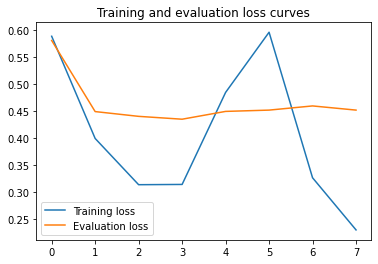

In [ ]:
train_loss = history['train_loss']
eval_loss = history['eval_loss']
plt.plot(train_loss, label='Training loss')
plt.plot(eval_loss, label='Evaluation loss')
plt.title('Training and evaluation loss curves')
plt.legend()
plt.show()

In [ ]:
import pickle

pickle.dump(model, open('drive/MyDrive/NLP2022/NLP_Project/models/roberta_tweet.pickle', 'wb'))

#### RoBERTa - Tokens Tweet

In [ ]:
!pip install simpletransformers

In [ ]:
from sklearn.model_selection import train_test_split

bert_train = df[['tokens_twt', 'subtask_a']]

bert_train, bert_val = train_test_split(bert_train, shuffle=True, random_state=42, test_size=.2)

print(bert_train.shape, bert_val.shape)

(10592, 2) (2648, 2)


In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs

model_args = ClassificationArgs()

model_args.overwrite_output_dir=True # overwrite existing saved models in the same directory
model_args.labels_list=[0, 1] 
model_args.evaluate_during_training=True

model_args.num_train_epochs=6
model_args.train_batch_size=64
model_args.learning_rate=1e-5
model_args.max_seq_length=128

model_args.use_early_stopping=True
model_args.early_stopping_delta=0.01 # "The improvement over best_eval_loss necessary to count as a better checkpoint"
model_args.early_stopping_metric='eval_loss'
model_args.early_stopping_metric_minimize=True 
model_args.early_stopping_patience=3 
model_args.evaluate_during_training_steps= 83 # Because each epoch will have 166 steps (83 * 2)

model_args.evaluate_during_training_silent=False
model_args.evaluate_each_epoch=False

In [ ]:
import numpy as np

steps_per_epoch = int(np.ceil(len(bert_train) / float(model_args.train_batch_size)))
print('Each epoch will have {:,} steps.'.format(steps_per_epoch))

Each epoch will have 166 steps.


In [ ]:
model = ClassificationModel('roberta', 'roberta-base', num_labels=2, args=model_args, use_cuda=True)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

In [ ]:
_, history = model.train_model(bert_train, eval_df=bert_val)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:586: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/10592 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 0 of 6:   0%|          | 0/166 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/2648 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/331 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/2648 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/331 [00:00<?, ?it/s]

Running Epoch 1 of 6:   0%|          | 0/166 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/2648 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/331 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/2648 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/331 [00:00<?, ?it/s]

Running Epoch 2 of 6:   0%|          | 0/166 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/2648 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/331 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/2648 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/331 [00:00<?, ?it/s]

Running Epoch 3 of 6:   0%|          | 0/166 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/2648 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/331 [00:00<?, ?it/s]

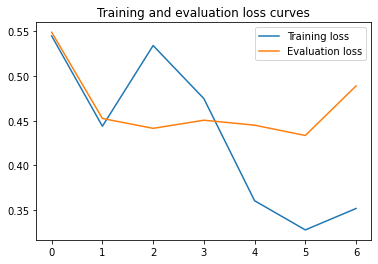

In [ ]:
train_loss = history['train_loss']
eval_loss = history['eval_loss']
plt.plot(train_loss, label='Training loss')
plt.plot(eval_loss, label='Evaluation loss')
plt.title('Training and evaluation loss curves')
plt.legend()
plt.show()

In [ ]:
import pickle

pickle.dump(model, open('drive/MyDrive/NLP2022/NLP_Project/models/roberta_tokens_tweet.pickle', 'wb'))

#### RoBERTa - Tokens Demojize

In [ ]:
!pip install simpletransformers

In [ ]:
from sklearn.model_selection import train_test_split

bert_train = df[['tokens', 'subtask_a']]

bert_train, bert_val = train_test_split(bert_train, shuffle=True, random_state=42, test_size=.2)

print(bert_train.shape, bert_val.shape)

(10592, 2) (2648, 2)


In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs

model_args = ClassificationArgs()

model_args.overwrite_output_dir=True # overwrite existing saved models in the same directory
model_args.labels_list=[0, 1] 
model_args.evaluate_during_training=True

model_args.num_train_epochs=6
model_args.train_batch_size=64
model_args.learning_rate=1e-5
model_args.max_seq_length=128

model_args.use_early_stopping=True
model_args.early_stopping_delta=0.01 # "The improvement over best_eval_loss necessary to count as a better checkpoint"
model_args.early_stopping_metric='eval_loss'
model_args.early_stopping_metric_minimize=True 
model_args.early_stopping_patience=3 
model_args.evaluate_during_training_steps= 83 # Because each epoch will have 166 steps (83 * 2)

model_args.evaluate_during_training_silent=False
model_args.evaluate_each_epoch=False

In [ ]:
import numpy as np

steps_per_epoch = int(np.ceil(len(bert_train) / float(model_args.train_batch_size)))
print('Each epoch will have {:,} steps.'.format(steps_per_epoch))

Each epoch will have 166 steps.


In [ ]:
model = ClassificationModel('roberta', 'roberta-base', num_labels=2, args=model_args, use_cuda=True)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

In [ ]:
_, history = model.train_model(bert_train, eval_df=bert_val)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:586: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/10592 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 0 of 6:   0%|          | 0/166 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/2648 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/331 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/2648 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/331 [00:00<?, ?it/s]

Running Epoch 1 of 6:   0%|          | 0/166 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/2648 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/331 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/2648 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/331 [00:00<?, ?it/s]

Running Epoch 2 of 6:   0%|          | 0/166 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/2648 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/331 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/2648 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/331 [00:00<?, ?it/s]

Running Epoch 3 of 6:   0%|          | 0/166 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/2648 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/331 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/2648 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/331 [00:00<?, ?it/s]

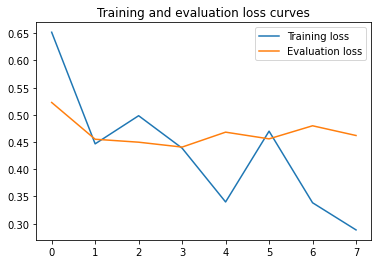

In [ ]:
train_loss = history['train_loss']
eval_loss = history['eval_loss']
plt.plot(train_loss, label='Training loss')
plt.plot(eval_loss, label='Evaluation loss')
plt.title('Training and evaluation loss curves')
plt.legend()
plt.show()

In [ ]:
import pickle

pickle.dump(model, open('drive/MyDrive/NLP2022/NLP_Project/models/roberta_tokens_demojize.pickle', 'wb'))

#### RoBERTa - Lemma

In [ ]:
!pip install simpletransformers

In [ ]:
from sklearn.model_selection import train_test_split

bert_train = df[['lemma_twt', 'subtask_a']]

bert_train, bert_val = train_test_split(bert_train, shuffle=True, random_state=42, test_size=.2)

print(bert_train.shape, bert_val.shape)

(10592, 2) (2648, 2)


In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs

model_args = ClassificationArgs()

model_args.overwrite_output_dir=True # overwrite existing saved models in the same directory
model_args.labels_list=[0, 1] 
model_args.evaluate_during_training=True

model_args.num_train_epochs=6
model_args.train_batch_size=64
model_args.learning_rate=1e-5
model_args.max_seq_length=128

model_args.use_early_stopping=True
model_args.early_stopping_delta=0.01 # "The improvement over best_eval_loss necessary to count as a better checkpoint"
model_args.early_stopping_metric='eval_loss'
model_args.early_stopping_metric_minimize=True 
model_args.early_stopping_patience=3 
model_args.evaluate_during_training_steps= 83 # Because each epoch will have 166 steps (83 * 2)

model_args.evaluate_during_training_silent=False
model_args.evaluate_each_epoch=False

In [ ]:
import numpy as np

steps_per_epoch = int(np.ceil(len(bert_train) / float(model_args.train_batch_size)))
print('Each epoch will have {:,} steps.'.format(steps_per_epoch))

Each epoch will have 166 steps.


In [ ]:
model = ClassificationModel('roberta', 'roberta-base', num_labels=2, args=model_args, use_cuda=True)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

In [ ]:
_, history = model.train_model(bert_train, eval_df=bert_val)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:586: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/10592 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 0 of 6:   0%|          | 0/166 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/2648 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/331 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/2648 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/331 [00:00<?, ?it/s]

Running Epoch 1 of 6:   0%|          | 0/166 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/2648 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/331 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/2648 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/331 [00:00<?, ?it/s]

Running Epoch 2 of 6:   0%|          | 0/166 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/2648 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/331 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/2648 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/331 [00:00<?, ?it/s]

Running Epoch 3 of 6:   0%|          | 0/166 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/2648 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/331 [00:00<?, ?it/s]

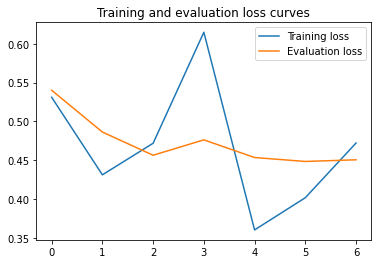

In [ ]:
train_loss = history['train_loss']
eval_loss = history['eval_loss']
plt.plot(train_loss, label='Training loss')
plt.plot(eval_loss, label='Evaluation loss')
plt.title('Training and evaluation loss curves')
plt.legend()
plt.show()

In [ ]:
import pickle

pickle.dump(model, open('drive/MyDrive/NLP2022/NLP_Project/models/roberta_lemma.pickle', 'wb'))

#### RoBERTa - No Hashtags Tweet

In [ ]:
!pip install simpletransformers

In [ ]:
from sklearn.model_selection import train_test_split

bert_train = df[['hashtag_gone2_twt', 'subtask_a']]

bert_train, bert_val = train_test_split(bert_train, shuffle=True, random_state=42, test_size=.2)

print(bert_train.shape, bert_val.shape)

(10592, 2) (2648, 2)


In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs

model_args = ClassificationArgs()

model_args.overwrite_output_dir=True # overwrite existing saved models in the same directory
model_args.labels_list=[0, 1] 
model_args.evaluate_during_training=True

model_args.num_train_epochs=6
model_args.train_batch_size=64
model_args.learning_rate=1e-5
model_args.max_seq_length=128

model_args.use_early_stopping=True
model_args.early_stopping_delta=0.01 # "The improvement over best_eval_loss necessary to count as a better checkpoint"
model_args.early_stopping_metric='eval_loss'
model_args.early_stopping_metric_minimize=True 
model_args.early_stopping_patience=3 
model_args.evaluate_during_training_steps= 83 # Because each epoch will have 166 steps (83 * 2)

model_args.evaluate_during_training_silent=False
model_args.evaluate_each_epoch=False

In [ ]:
import numpy as np

steps_per_epoch = int(np.ceil(len(bert_train) / float(model_args.train_batch_size)))
print('Each epoch will have {:,} steps.'.format(steps_per_epoch))

Each epoch will have 166 steps.


In [ ]:
model = ClassificationModel('roberta', 'roberta-base', num_labels=2, args=model_args, use_cuda=True)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

In [ ]:
_, history = model.train_model(bert_train, eval_df=bert_val)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:586: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/10592 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 0 of 6:   0%|          | 0/166 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/2648 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/331 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/2648 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/331 [00:00<?, ?it/s]

Running Epoch 1 of 6:   0%|          | 0/166 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/2648 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/331 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/2648 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/331 [00:00<?, ?it/s]

Running Epoch 2 of 6:   0%|          | 0/166 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/2648 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/331 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/2648 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/331 [00:00<?, ?it/s]

Running Epoch 3 of 6:   0%|          | 0/166 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/2648 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/331 [00:00<?, ?it/s]

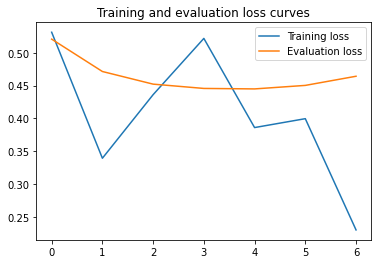

In [ ]:
train_loss = history['train_loss']
eval_loss = history['eval_loss']
plt.plot(train_loss, label='Training loss')
plt.plot(eval_loss, label='Evaluation loss')
plt.title('Training and evaluation loss curves')
plt.legend()
plt.show()

In [ ]:
import pickle

pickle.dump(model, open('drive/MyDrive/NLP2022/NLP_Project/models/roberta_hashtag_tweet.pickle', 'wb'))

### Majority Vote

#### Load Models

In [ ]:
!pip install simpletransformers

In [ ]:
import pickle

from simpletransformers.classification import ClassificationModel, ClassificationArgs
from sklearn.model_selection import train_test_split

In [ ]:
model1 = pickle.load(open('drive/MyDrive/NLP2022/NLP_Project/models/roberta_tweet.pickle', 'rb'))
model2 = pickle.load(open('drive/MyDrive/NLP2022/NLP_Project/models/roberta_tokens_tweet.pickle', 'rb'))
model3 = pickle.load(open('drive/MyDrive/NLP2022/NLP_Project/models/roberta_tokens_demojize.pickle', 'rb'))
model4 = pickle.load(open('drive/MyDrive/NLP2022/NLP_Project/models/roberta_lemma.pickle', 'rb'))
model5 = pickle.load(open('drive/MyDrive/NLP2022/NLP_Project/models/roberta_hashtag_tweet.pickle', 'rb'))

#### - test_IN -

In [ ]:
bert_test = df1

predicted1, probabilities = model1.predict(bert_test['tweet'].to_list())
bert_test['predicted1'] = predicted1
mv_tweet = bert_test[['id', 'predicted1']]

predicted2, probabilities = model2.predict((bert_test['tokens_twt'].apply(str)).to_list())
bert_test['predicted2'] = predicted2
mv_tokens = bert_test[['id', 'predicted2']]

predicted3, probabilities = model3.predict((bert_test['tokens'].apply(str)).to_list())
bert_test['predicted3'] = predicted3
mv_tokens_demojize = bert_test[['id', 'predicted3']]

predicted4, probabilities = model4.predict(bert_test['lemma_twt'].to_list())
bert_test['predicted4'] = predicted4
mv_lemma = bert_test[['id', 'predicted4']]

predicted5, probabilities = model5.predict(bert_test['hashtag_gone2_twt'].to_list())
bert_test['predicted5'] = predicted5
mv_hashtag = bert_test[['id', 'predicted5']]

  0%|          | 0/860 [00:00<?, ?it/s]

  0%|          | 0/108 [00:00<?, ?it/s]

  0%|          | 0/860 [00:00<?, ?it/s]

  0%|          | 0/108 [00:00<?, ?it/s]

  0%|          | 0/860 [00:00<?, ?it/s]

  0%|          | 0/108 [00:00<?, ?it/s]

  0%|          | 0/860 [00:00<?, ?it/s]

  0%|          | 0/108 [00:00<?, ?it/s]

  0%|          | 0/860 [00:00<?, ?it/s]

  0%|          | 0/108 [00:00<?, ?it/s]

In [ ]:
mv_data = []
mv_df = pd.DataFrame(data=mv_data)

In [ ]:
mv_df['twt'] = mv_tweet['predicted1'].tolist()
mv_df['tok_tw'] = mv_tokens['predicted2'].tolist()
mv_df['tok_d'] = mv_tokens_demojize['predicted3'].tolist()
mv_df['lem'] = mv_lemma['predicted4'].tolist()
mv_df['hsh'] = mv_hashtag['predicted5'].tolist()

In [ ]:
#Sum all 1s and 0s together for each row (integers ranging between 0 and 5)

mv_df['sum'] = mv_df['twt'] + mv_df['tok_tw'] + mv_df['tok_d'] + mv_df['lem'] + mv_df['hsh']

In [ ]:
#MAJORITY VOTE

mv_df['mv'] = ''

for index, row in mv_df.iterrows():
    if row['sum'] <= 2:
        mv_df.at[index, 'mv'] = 0     #If only two or fewer models label the input as offensive, the input is labeled as non-offensive
    elif row['sum'] >= 3:
        mv_df.at[index, 'mv'] = 1     #If three or more models label the input as offensive, the input is labeled as offensive

mv_df.head(10)

,twt,tok_tw,tok_d,lem,hsh,sum,mv
0,1,1,1,1,1,5,1
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
5,1,1,1,1,1,5,1
6,0,1,1,1,1,4,1
7,1,1,1,1,1,5,1
8,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0


In [ ]:
mv_df.mv.replace({0 :'NOT', 1 : 'OFF'}, inplace=True)
id = pd.DataFrame(data=df1['id'])
test_output1 = pd.concat([id, mv_df['mv']], axis=1)
test_output1.rename(columns={"id" : "id", "mv" : "label"}, inplace=True)
print(test_output1)

mv_df.twt.replace({0 :'NOT', 1 : 'OFF'}, inplace=True)
id = pd.DataFrame(data=df1['id'])
test_output2 = pd.concat([id, mv_df['twt']], axis=1)
test_output2.rename(columns={"id" : "id", "twt" : "label"}, inplace=True)
print(test_output2)

        id label
0    15923   OFF
1    27014   NOT
2    30530   NOT
3    13876   NOT
4    60133   NOT
..     ...   ...
855  73439   OFF
856  25657   NOT
857  67018   OFF
858  50665   OFF
859  24583   NOT

[860 rows x 2 columns]
        id label
0    15923   OFF
1    27014   NOT
2    30530   NOT
3    13876   NOT
4    60133   NOT
..     ...   ...
855  73439   NOT
856  25657   NOT
857  67018   OFF
858  50665   OFF
859  24583   NOT

[860 rows x 2 columns]


In [ ]:
# The Majoriy Vote Results as a CSV
test_output1.to_csv(r'drive/MyDrive/NLP2022/NLP_Project/test_IN_neural_mv.csv', index = False)

# The RoBERTa Tweet Results as a CSV
test_output2.to_csv(r'drive/MyDrive/NLP2022/NLP_Project/test_IN_neural_RoBERTa.csv', index = False)

#### - test_OUT1 -

In [ ]:
bert_test2 = df2

predicted1, probabilities = model1.predict(bert_test2['tweet'].to_list())
bert_test2['predicted1'] = predicted1
mv_tweet = bert_test2[['id', 'predicted1']]

predicted2, probabilities = model2.predict((bert_test2['tokens_twt'].apply(str)).to_list())
bert_test2['predicted2'] = predicted2
mv_tokens = bert_test2[['id', 'predicted2']]

predicted3, probabilities = model3.predict((bert_test2['tokens'].apply(str)).to_list())
bert_test2['predicted3'] = predicted3
mv_tokens_demojize = bert_test2[['id', 'predicted3']]

predicted4, probabilities = model4.predict(bert_test2['lemma_twt'].to_list())
bert_test2['predicted4'] = predicted4
mv_lemma = bert_test2[['id', 'predicted4']]

predicted5, probabilities = model5.predict(bert_test2['hashtag_gone2_twt'].to_list())
bert_test2['predicted5'] = predicted5
mv_hashtag = bert_test2[['id', 'predicted5']]

  0%|          | 0/1207 [00:00<?, ?it/s]

  0%|          | 0/151 [00:00<?, ?it/s]

  0%|          | 0/1207 [00:00<?, ?it/s]

  0%|          | 0/151 [00:00<?, ?it/s]

  0%|          | 0/1207 [00:00<?, ?it/s]

  0%|          | 0/151 [00:00<?, ?it/s]

  0%|          | 0/1207 [00:00<?, ?it/s]

  0%|          | 0/151 [00:00<?, ?it/s]

  0%|          | 0/1207 [00:00<?, ?it/s]

  0%|          | 0/151 [00:00<?, ?it/s]

In [ ]:
mv_data = []
mv_df = pd.DataFrame(data=mv_data)

In [ ]:
mv_df['twt'] = mv_tweet['predicted1'].tolist()
mv_df['tok_tw'] = mv_tokens['predicted2'].tolist()
mv_df['tok_d'] = mv_tokens_demojize['predicted3'].tolist()
mv_df['lem'] = mv_lemma['predicted4'].tolist()
mv_df['hsh'] = mv_hashtag['predicted5'].tolist()

In [ ]:
#Sum all 1s and 0s together for each row (integers ranging between 0 and 5)

mv_df['sum'] = mv_df['twt'] + mv_df['tok_tw'] + mv_df['tok_d'] + mv_df['lem'] + mv_df['hsh']

In [ ]:
#MAJORITY VOTE

mv_df['mv'] = ''

for index, row in mv_df.iterrows():
    if row['sum'] <= 2:
        mv_df.at[index, 'mv'] = 0     #If only two or fewer models label the input as offensive, the input is labeled as non-offensive
    elif row['sum'] >= 3:
        mv_df.at[index, 'mv'] = 1     #If three or more models label the input as offensive, the input is labeled as offensive

mv_df.head(10)

,twt,tok_tw,tok_d,lem,hsh,sum,mv
0,0,0,0,0,0,0,0
1,1,1,1,1,1,5,1
2,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0
4,1,1,1,1,1,5,1
5,1,1,1,1,1,5,1
6,1,1,1,1,1,5,1
7,1,1,1,1,1,5,1
8,1,1,1,1,1,5,1
9,1,1,1,1,1,5,1


In [ ]:
mv_df.mv.replace({0 :'NOT', 1 : 'OFF'}, inplace=True)
id = pd.DataFrame(data=df1['id'])
test_output1 = pd.concat([id, mv_df['mv']], axis=1)
test_output1.rename(columns={"id" : "id", "mv" : "label"}, inplace=True)
print(test_output1)

mv_df.twt.replace({0 :'NOT', 1 : 'OFF'}, inplace=True)
id = pd.DataFrame(data=df1['id'])
test_output2 = pd.concat([id, mv_df['twt']], axis=1)
test_output2.rename(columns={"id" : "id", "twt" : "label"}, inplace=True)
print(test_output2)

           id label
0     15923.0   NOT
1     27014.0   OFF
2     30530.0   NOT
3     13876.0   NOT
4     60133.0   OFF
...       ...   ...
1202      NaN   NOT
1203      NaN   OFF
1204      NaN   NOT
1205      NaN   NOT
1206      NaN   OFF

[1207 rows x 2 columns]
           id label
0     15923.0   NOT
1     27014.0   OFF
2     30530.0   NOT
3     13876.0   NOT
4     60133.0   OFF
...       ...   ...
1202      NaN   NOT
1203      NaN   OFF
1204      NaN   NOT
1205      NaN   NOT
1206      NaN   OFF

[1207 rows x 2 columns]


In [ ]:
test_output1.to_csv(r'drive/MyDrive/NLP2022/NLP_Project/test_OUT1_neural_mv.csv', index = False)
test_output2.to_csv(r'drive/MyDrive/NLP2022/NLP_Project/test_OUT1_neural_RoBERTa.csv', index = False)

#### - test_OUT2 -

In [ ]:
bert_test3 = df3

predicted1, probabilities = model1.predict(bert_test3['tweet'].to_list())
bert_test3['predicted1'] = predicted1
mv_tweet = bert_test3[['id', 'predicted1']]

predicted2, probabilities = model2.predict((bert_test3['tokens_twt'].apply(str)).to_list())
bert_test3['predicted2'] = predicted2
mv_tokens = bert_test3[['id', 'predicted2']]

predicted3, probabilities = model3.predict((bert_test3['tokens'].apply(str)).to_list())
bert_test3['predicted3'] = predicted3
mv_tokens_demojize = bert_test3[['id', 'predicted3']]

predicted4, probabilities = model4.predict(bert_test3['lemma_twt'].to_list())
bert_test3['predicted4'] = predicted4
mv_lemma = bert_test3[['id', 'predicted4']]

predicted5, probabilities = model5.predict(bert_test3['hashtag_gone2_twt'].to_list())
bert_test3['predicted5'] = predicted5
mv_hashtag = bert_test3[['id', 'predicted5']]

  0%|          | 0/1200 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/1200 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/1200 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/1200 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/1200 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

In [ ]:
mv_data = []
mv_df = pd.DataFrame(data=mv_data)

In [ ]:
mv_df['twt'] = mv_tweet['predicted1'].tolist()
mv_df['tok_tw'] = mv_tokens['predicted2'].tolist()
mv_df['tok_d'] = mv_tokens_demojize['predicted3'].tolist()
mv_df['lem'] = mv_lemma['predicted4'].tolist()
mv_df['hsh'] = mv_hashtag['predicted5'].tolist()

In [ ]:
#Sum all 1s and 0s together for each row (integers ranging between 0 and 5)

mv_df['sum'] = mv_df['twt'] + mv_df['tok_tw'] + mv_df['tok_d'] + mv_df['lem'] + mv_df['hsh']

In [ ]:
#MAJORITY VOTE

mv_df['mv'] = ''

for index, row in mv_df.iterrows():
    if row['sum'] <= 2:
        mv_df.at[index, 'mv'] = 0     #If only two or fewer models label the input as offensive, the input is labeled as non-offensive
    elif row['sum'] >= 3:
        mv_df.at[index, 'mv'] = 1     #If three or more models label the input as offensive, the input is labeled as offensive

mv_df.head(10)

,twt,tok_tw,tok_d,lem,hsh,sum,mv
0,1,1,1,1,1,5,1
1,1,1,1,1,1,5,1
2,1,1,0,1,0,3,1
3,1,1,1,1,1,5,1
4,0,0,0,0,0,0,0
5,1,1,1,1,1,5,1
6,0,0,0,0,0,0,0
7,1,1,1,1,1,5,1
8,0,0,0,0,0,0,0
9,1,1,1,1,1,5,1


In [ ]:
mv_df.mv.replace({0 :'NOT', 1 : 'OFF'}, inplace=True)
id = pd.DataFrame(data=df1['id'])
test_output1 = pd.concat([id, mv_df['mv']], axis=1)
test_output1.rename(columns={"id" : "id", "mv" : "label"}, inplace=True)
print(test_output1)

mv_df.twt.replace({0 :'NOT', 1 : 'OFF'}, inplace=True)
id = pd.DataFrame(data=df1['id'])
test_output2 = pd.concat([id, mv_df['twt']], axis=1)
test_output2.rename(columns={"id" : "id", "twt" : "label"}, inplace=True)
print(test_output2)

           id label
0     15923.0   OFF
1     27014.0   OFF
2     30530.0   OFF
3     13876.0   OFF
4     60133.0   NOT
...       ...   ...
1195      NaN   NOT
1196      NaN   OFF
1197      NaN   OFF
1198      NaN   NOT
1199      NaN   NOT

[1200 rows x 2 columns]
           id label
0     15923.0   OFF
1     27014.0   OFF
2     30530.0   OFF
3     13876.0   OFF
4     60133.0   NOT
...       ...   ...
1195      NaN   NOT
1196      NaN   OFF
1197      NaN   OFF
1198      NaN   NOT
1199      NaN   NOT

[1200 rows x 2 columns]


In [ ]:
test_output1.to_csv(r'drive/MyDrive/NLP2022/NLP_Project/test_OUT2_neural_mv.csv', index = False)
test_output2.to_csv(r'drive/MyDrive/NLP2022/NLP_Project/test_OUT2_neural_RoBERTa.csv', index = False)

#### - test_TEXTGAIN -

In [ ]:
bert_test4 = df4

predicted1, probabilities = model1.predict(bert_test4['tweet'].to_list())
bert_test4['predicted1'] = predicted1
mv_tweet = bert_test4[['id', 'predicted1']]

predicted2, probabilities = model2.predict((bert_test4['tokens_twt'].apply(str)).to_list())
bert_test4['predicted2'] = predicted2
mv_tokens = bert_test4[['id', 'predicted2']]

predicted3, probabilities = model3.predict((bert_test4['tokens'].apply(str)).to_list())
bert_test4['predicted3'] = predicted3
mv_tokens_demojize = bert_test4[['id', 'predicted3']]

predicted4, probabilities = model4.predict(bert_test4['lemma_twt'].to_list())
bert_test4['predicted4'] = predicted4
mv_lemma = bert_test4[['id', 'predicted4']]

predicted5, probabilities = model5.predict(bert_test4['hashtag_gone2_twt'].to_list())
bert_test4['predicted5'] = predicted5
mv_hashtag = bert_test4[['id', 'predicted5']]

  0%|          | 0/1276 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/1276 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/1276 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/1276 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/1276 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

In [ ]:
mv_data = []
mv_df = pd.DataFrame(data=mv_data)

In [ ]:
mv_df['twt'] = mv_tweet['predicted1'].tolist()
mv_df['tok_tw'] = mv_tokens['predicted2'].tolist()
mv_df['tok_d'] = mv_tokens_demojize['predicted3'].tolist()
mv_df['lem'] = mv_lemma['predicted4'].tolist()
mv_df['hsh'] = mv_hashtag['predicted5'].tolist()

In [ ]:
#Sum all 1s and 0s together for each row (integers ranging between 0 and 5)

mv_df['sum'] = mv_df['twt'] + mv_df['tok_tw'] + mv_df['tok_d'] + mv_df['lem'] + mv_df['hsh']

In [ ]:
#MAJORITY VOTE

mv_df['mv'] = ''

for index, row in mv_df.iterrows():
    if row['sum'] <= 2:
        mv_df.at[index, 'mv'] = 0     #If only two or fewer models label the input as offensive, the input is labeled as non-offensive
    elif row['sum'] >= 3:
        mv_df.at[index, 'mv'] = 1     #If three or more models label the input as offensive, the input is labeled as offensive

In [ ]:
mv_df.mv.replace({0 :'NOT', 1 : 'OFF'}, inplace=True)
id = pd.DataFrame(data=df1['id'])
test_output1 = pd.concat([id, mv_df['mv']], axis=1)
test_output1.rename(columns={"id" : "id", "mv" : "label"}, inplace=True)
print(test_output1)

mv_df.twt.replace({0 :'NOT', 1 : 'OFF'}, inplace=True)
id = pd.DataFrame(data=df1['id'])
test_output2 = pd.concat([id, mv_df['twt']], axis=1)
test_output2.rename(columns={"id" : "id", "twt" : "label"}, inplace=True)
print(test_output2)

           id label
0     15923.0   NOT
1     27014.0   OFF
2     30530.0   OFF
3     13876.0   OFF
4     60133.0   NOT
...       ...   ...
1271      NaN   NOT
1272      NaN   NOT
1273      NaN   NOT
1274      NaN   NOT
1275      NaN   NOT

[1276 rows x 2 columns]
           id label
0     15923.0   NOT
1     27014.0   OFF
2     30530.0   OFF
3     13876.0   OFF
4     60133.0   NOT
...       ...   ...
1271      NaN   NOT
1272      NaN   NOT
1273      NaN   NOT
1274      NaN   NOT
1275      NaN   NOT

[1276 rows x 2 columns]


In [ ]:
test_output1.to_csv(r'drive/MyDrive/NLP2022/NLP_Project/test_TEXTGAIN_neural_mv.csv', index = False)
test_output2.to_csv(r'drive/MyDrive/NLP2022/NLP_Project/test_TEXTGAIN_neural_RoBERTa.csv', index = False)